# Scraping - Solutions

## Obtenir les derniers articles du Monde (**)

* Obtenir le titre et le chapeau (description) des derniers articles sur https://www.lemonde.fr/actualite-en-continu/ (*)
* Enregistrer les images correspondantes (***, @)

In [1]:
#!pip install beautifulsoup4
import requests
from bs4 import BeautifulSoup

**$\rightarrow$ Obtenir le titre et les chapeaux**

La premi√®re √©tape est de demander la page au serveur en utilisant la fonction `requests.get`.

In [2]:
page = requests.get("https://www.lemonde.fr/actualite-en-continu/")
print(page)

<Response [200]>


In [3]:
page.status_code

200

Noter le code de r√©ponse : 200 = Success.

On peut afficher le contenu HTML de la page avec **l'attribut `content`**.

In [4]:
page.content

b'               <!DOCTYPE html> <html lang="fr" prefix="og: http://ogp.me/ns#"> <head> <meta charset="UTF-8"> <meta http-equiv="X-UA-Compatible" content="IE=edge"> <meta name="viewport" content="width=device-width, initial-scale=1, shrink-to-fit=no"> <meta name="referrer" content="no-referrer-when-downgrade"> <meta name="theme-color" content="#ffffff">    <link rel="preconnect" href="//img.lemde.fr">   <link rel="preload" href="//www.lemonde.fr/bucket/assets/ec2ba75656dea0372f5c6f2b57cb077805226280/fonts/marr-sans/MarrSans-Medium-Web.woff2" as="font" type="font/woff2" crossorigin> <link rel="preload" href="//www.lemonde.fr/bucket/assets/ec2ba75656dea0372f5c6f2b57cb077805226280/fonts/marr-sans-cond/MarrSansCondensed-Medium-Web.woff2" as="font" type="font/woff2" crossorigin> <link rel="preload" href="//www.lemonde.fr/bucket/assets/ec2ba75656dea0372f5c6f2b57cb077805226280/fonts/variables/the-antiqua-b/TheAntiquaB-LeMonde.woff2" as="font" type="font/woff2" crossorigin>  <link rel="manifes

L'√©tape suivante est d'utiliser BeautifulSoup pour parser ce document.

In [5]:
soup = BeautifulSoup(page.content)

print(soup.prettify()) # pour un meilleur affichage

<!DOCTYPE html>
<html lang="fr" prefix="og: http://ogp.me/ns#">
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="width=device-width, initial-scale=1, shrink-to-fit=no" name="viewport"/>
  <meta content="no-referrer-when-downgrade" name="referrer"/>
  <meta content="#ffffff" name="theme-color"/>
  <link href="//img.lemde.fr" rel="preconnect"/>
  <link as="font" crossorigin="" href="//www.lemonde.fr/bucket/assets/ec2ba75656dea0372f5c6f2b57cb077805226280/fonts/marr-sans/MarrSans-Medium-Web.woff2" rel="preload" type="font/woff2"/>
  <link as="font" crossorigin="" href="//www.lemonde.fr/bucket/assets/ec2ba75656dea0372f5c6f2b57cb077805226280/fonts/marr-sans-cond/MarrSansCondensed-Medium-Web.woff2" rel="preload" type="font/woff2"/>
  <link as="font" crossorigin="" href="//www.lemonde.fr/bucket/assets/ec2ba75656dea0372f5c6f2b57cb077805226280/fonts/variables/the-antiqua-b/TheAntiquaB-LeMonde.woff2" rel="preload" type="font/woff2"/>
  <l

On peut ensuite extraire le texte depuis les tags qui nous int√©ressent.

Pour conna√Ætre le noms des tags pertinents, on utilise l'inspecteur du navigateur. On va se concentrer sur la section `id="river"`, qui contient les articles :

In [8]:
content = soup.find('section', {'id':'river'})
content

<section class="river river--en-continu river--short old__river" id="river"> <h2 class="river__title">Les derniers articles</h2> <section class="teaser teaser--inline-picture teaser--picto teaser--testimony"> <figure class="teaser__figure teaser__figure--page"> <picture class="teaser__picture teaser__picture--3-2"> <source data-srcset="https://img.lemde.fr/2023/12/11/18/0/4037/2691/780/520/60/0/9722193_2023-12-11t123153z-997031133-rc2zu4a93bjs-rtrmadp-3-israel-palestinians-rockets.JPG" media="(min-width: 576px)"> <img alt="" class="teaser__media" data-src="https://img.lemde.fr/2023/12/11/18/0/4037/2691/110/73/60/0/9722193_2023-12-11t123153z-997031133-rc2zu4a93bjs-rtrmadp-3-israel-palestinians-rockets.JPG" height="74" width="110"/> <noscript> <img alt="" class="teaser__media" height="74" src="https://img.lemde.fr/2023/12/11/18/0/4037/2691/110/73/60/0/9722193_2023-12-11t123153z-997031133-rc2zu4a93bjs-rtrmadp-3-israel-palestinians-rockets.JPG" width="110"/> </noscript> </source></picture>

In [9]:
# Syntaxe alternative : la m√©thode select

content2 = soup.select("html body section#river .teaser")

# Cette m√©thode utilise la syntaxe CSS pour rechercher un tag.
# Elle est parfois plus rapide √† √©crire. Les tags successifs sont
# separ√©s par des espaces, les # d√©signent une class et les . un id.
# On peut obtenir le chemin CSS avec clic droit dans l'inspecteur.

On isole les titres (`h3`) et les chapeaux (`p`, `class='teaser__desc'`) des articles :

In [19]:
titres = content.find_all('h3')
titres

[<h3 class="teaser__title">En direct, guerre Isra√´l-Hamas¬†: les derni√®res informations</h3>,
 <h3 class="teaser__title">Loi ¬´¬†immigration¬†¬ª¬†: la bataille d√©marre √† l‚ÄôAssembl√©e, le gouvernement sans certitude</h3>,
 <h3 class="teaser__title">Ligue des champions¬†: les supporteurs du FC¬†S√©ville interdits de d√©placement √† Lens</h3>,
 <h3 class="teaser__title">Les chauffeurs de taxi d√©filent contre le covoiturage de patients m√©dicalis√©s</h3>,
 <h3 class="teaser__title">En Gr√®ce, les matchs de football se d√©rouleront √† huis clos jusqu‚Äôau 12¬†f√©vrier pour endiguer les¬†violences</h3>,
 <h3 class="teaser__title">Plusieurs d√©missions d√®s la premi√®re r√©union de la commission parentalit√© lanc√©e par le gouvernement</h3>,
 <h3 class="teaser__title">Le compte X du conspirationniste Alex Jones r√©tabli par Elon Musk</h3>,
 <h3 class="teaser__title">Au Mali, fin de la mission de l‚ÄôONU apr√®s dix ans de pr√©sence</h3>,
 <h3 class="teaser__title">En direct, le¬†projet 

In [17]:
chapeaux = content.find_all('p', {'class': 'teaser__desc'})
chapeaux

[<p class="teaser__desc">Le Croissant-Rouge palestinien a fait √©tat, lundi, de ¬´¬†plusieurs raids violents¬†¬ª autour de l‚Äôh√¥pital Al-Amal, pr√®s de Khan Youn√®s, dans le sud de la bande de Gaza. Par ailleurs, Magen David Adom a rapport√© que des roquettes √©taient tomb√©es sur la ville d‚ÄôHolon, situ√©e √† 10 kilom√®tres de Tel Aviv.</p>,
 <p class="teaser__desc">Alors que l‚Äôexamen du texte commence lundi 11¬†d√©cembre en s√©ance publique au Palais-Bourbon, le ministre de l‚Äôint√©rieur, G√©rald Darmanin, n‚Äôest pas assur√© de disposer de suffisamment de voix pour le faire adopter.</p>,
 <p class="teaser__desc">Un arr√™t√© pr√©fectoral publi√© lundi a officialis√© l‚Äôannonce faite, la veille, par le ministre de l‚Äôint√©rieur. La mesure a provoqu√© l‚Äôire des fans des deux clubs, oppos√©s, mardi soir, dans le cadre de la derni√®re journ√©e des phases de groupes de la comp√©tition.</p>,
 <p class="teaser__desc">Les taxis s‚Äôopposent √† un article du budget de la S√©curit√© 

In [18]:
titres[0].get_text()

AttributeError: 'str' object has no attribute 'get_text'

Le package `unidecode` permet de d√©coder les caract√®res unicode pour nettoyer le texte obtenu :

In [13]:
!pip install unidecode


[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


In [14]:
from unidecode import unidecode

unidecode('Attentats de 2016 √† Bruxelles\xa0: Salah Abdeslam et neuf\xa0autres inculp√©s renvoy√©s aux assises')

'Attentats de 2016 a Bruxelles : Salah Abdeslam et neuf autres inculpes renvoyes aux assises'

In [15]:
# Nettoyage sous forme de boucle
titres_clean = []
for t in titres:
    titres_clean.append( unidecode(t.get_text()) )
titres_clean

['En direct, guerre Israel-Hamas : les dernieres informations',
 "Loi << immigration >> : la bataille demarre a l'Assemblee, le gouvernement sans certitude",
 'Ligue des champions : les supporteurs du FC Seville interdits de deplacement a Lens',
 'Les chauffeurs de taxi defilent contre le covoiturage de patients medicalises',
 "En Grece, les matchs de football se derouleront a huis clos jusqu'au 12 fevrier pour endiguer les violences",
 'Plusieurs demissions des la premiere reunion de la commission parentalite lancee par le gouvernement',
 'Le compte X du conspirationniste Alex Jones retabli par Elon Musk',
 "Au Mali, fin de la mission de l'ONU apres dix ans de presence",
 "En direct, le projet de loi << immigration >> examine a l'Assemblee nationale : suivez les debats a partir de 16 heures",
 "En direct, guerre en Ukraine : l'armee russe a lance de nouveaux assauts sur la ville d'Avdiivka, selon l'armee ukrainienne",
 'Le train de nuit Paris-Berlin fait son retour',
 "L'ONU lance un 

In [16]:
# Nettoyage sous forme de list comprehension (mieux)
titres = [ unidecode(t.get_text()) for t in titres ]
titres

['En direct, guerre Israel-Hamas : les dernieres informations',
 "Loi << immigration >> : la bataille demarre a l'Assemblee, le gouvernement sans certitude",
 'Ligue des champions : les supporteurs du FC Seville interdits de deplacement a Lens',
 'Les chauffeurs de taxi defilent contre le covoiturage de patients medicalises',
 "En Grece, les matchs de football se derouleront a huis clos jusqu'au 12 fevrier pour endiguer les violences",
 'Plusieurs demissions des la premiere reunion de la commission parentalite lancee par le gouvernement',
 'Le compte X du conspirationniste Alex Jones retabli par Elon Musk',
 "Au Mali, fin de la mission de l'ONU apres dix ans de presence",
 "En direct, le projet de loi << immigration >> examine a l'Assemblee nationale : suivez les debats a partir de 16 heures",
 "En direct, guerre en Ukraine : l'armee russe a lance de nouveaux assauts sur la ville d'Avdiivka, selon l'armee ukrainienne",
 'Le train de nuit Paris-Berlin fait son retour',
 "L'ONU lance un 

In [15]:
chapeaux = [unidecode(t.get_text()) for t in chapeaux]
chapeaux

["Le secretaire general de l'ONU, Antonio Guterres, s'est exprime mercredi dans une lettre inedite au Conseil de securite ou il a insiste pour un cessez-le-feu humanitaire.",
 "Pendant le tournage du film << Disco >> en 2007, Gerard Depardieu aurait << pelote >> Helene Darras, alors figurante dans le film. La plainte en cours d'analyse porte a priori sur des faits prescrits selon le parquet de Paris.",
 "L'ancien depute ukrainien, age de 46 ans, avait appele l'Ukraine a capituler sur une chaine de television russe. En novembre, un tribunal de Lviv l'avait condamne par contumace a quatorze ans de prison, le declarant coupable de plusieurs chefs d'accusation, y compris de trahison.",
 "Sony lance sa premiere manette PlayStation pensee pour les joueurs handicapes, un public dont se preoccupe l'industrie depuis cinq ans apres l'avoir longtemps largement ignore.",
 "<< Narco Business, les filieres du fentanyl >> (1/3). Bertrand Monnet, professeur a l'Edhec et specialiste de l'economie du cr

Pour terminer, on peut √©ventuellement stocker les r√©sultats dans un dataframe :

In [16]:
import pandas as pd

In [17]:
# Cr√©ation du df √† partir d'un dictionnaire
dico = {'titre':titres, 'chapeau':chapeaux}
pd.DataFrame(dico)

titre  \
0   En direct, guerre Israel-Hamas : l'ONU met en ...   
1   Gerard Depardieu vise par une deuxieme plainte...   
2   En direct, guerre en Ukraine : Illia Kyva, un ...   
3   Handicap et jeu video : des reponses tres dive...   
4   Comment les labos mexicains << cuisinent >> le...   
5   Violences sexistes et sexuelles dans les trans...   
6   Au moins 47 millions de controles d'identite c...   
7   Paris 2024 : les hoteliers font flamber leurs ...   
8   Mort de Thomas a Crepol : enquete a Paris sur ...   
9   En Alsace, les grandes esperances du lithium g...   
10  Rixe mortelle dans le Val-d'Oise : cinq person...   
11  << Le dilemme >> : puis-je arreter de m'inform...   
12  A Paris, The Conran Shop fermera definitivemen...   
13  En Chine, la premiere centrale nucleaire de qu...   
14  Botulisme a Bordeaux : le patron du Tchin Tchi...   
15  IA : avec Gemini, Google entend rivaliser avec...   
16  Taylor Swift designee personnalite de l'annee ...   
17  A Mayotte, l'eau interdite a la consommation s...   
18  Lecteurs du << Monde >>, votez pour vos romans...   
19  Vinted, un succes qui torpille toute la chaine...   
20  En Ukraine, la rivalite croissante entre Volod...   
21  Marie-George Buffet : << Le sport francais est...   
22  Au Royaume-Uni, Boris Johnson presente ses exc...   
23  Le groupuscule d'ultradroite Division Martel a...   
24  Les compagnies aeriennes attendent 4,7 milliar...   
25  Projet de loi << immigration >> : Les Republic...   
26  Marie-George Buffet et Stephane Diagana appell...   
27  Paris 2024 : la Mairie de Paris demande a Vale...   
28  Creation de logements sociaux : un nombre reco...   
29  L'Iran reactive, du Liban au Yemen, les fronts...   
30  << Ferme ta gueule >>, lance Gerard Larcher a ...   
31  << La propagande de l'Etat islamique seduit un...   
32  Attentat a Paris : ouverture d'une information...   
33  Algorithme des CAF : le departement de Seine-S...   
34  Le Niger renforce sa cooperation avec la Russi...   
35  Les Etats-Unis adoptent pour la premiere fois ...   
36  Referendum sur l'Essequibo : le Venezuela ordo...   
37  L'Europe importe toujours des produits issus d...   
38  L'annee 2023 deja consideree comme la plus cha...   
39  Paris 2024 : a Teahupoo, les epreuves olympiqu...   
40  Gabriel Attal decrete la fin du college << uni...   
41  La FNSEA annonce obtenir l'abandon de la hauss...   
42  Mort de Denny Laine, fondateur des Wings avec ...   
43  Elon Musk veut lever 1 milliard de dollars pou...   
44  << Charlie Hebdo >> poursuivi en diffamation p...   
45  Perou : l'ancien president Alberto Fujimori va...   
46  Une Americaine, dont la grossesse est a tres h...   
47  Pacte de stabilite : la France et l'Allemagne ...   
48  Portugal-France en Ligue des nations feminine ...   
49  Qu'est-ce que l'<< axe de la resistance >> pro...   
50  Wauquiez cherche a enroler les maires pour rel...   
51  Violences conjugales : Mathias Vicherat dit <<...   
52  Pesticides SDHI : l'Anses n'identifie pas de r...   
53  Elisabeth Borne accuse le Rassemblement nation...   
54  Botulisme a Bordeaux : le patron du Tchin-Tchi...   
55  Paris 2024 : le monde olympique demande au CIO...   
56  Anthony Fauci, ex << M. Covid >> de la Maison ...   
57  Declaration de patrimoine : l'ancien president...   
58  A Dubai, une COP28 qui se veut << inclusive >>...   
59    Le groupe CBC Radio-Canada supprime 600 emplois   

                                              chapeau  
0   Le secretaire general de l'ONU, Antonio Guterr...  
1   Pendant le tournage du film << Disco >> en 200...  
2   L'ancien depute ukrainien, age de 46 ans, avai...  
3   Sony lance sa premiere manette PlayStation pen...  
4   << Narco Business, les filieres du fentanyl >>...  
5   Toute personne se sentant menacee est censee p...  
6   Saisis par la Defenseure des droits, les magis...  
7   Des << Ibis >> a 700 euros la nuit, des << 4 e...  
8   Les investigations ont ete confiees a l'Office...  
9   Le gro

In [18]:
# Cr√©ation du df √† partir d'une liste
df = pd.DataFrame([titres, chapeaux]).T
df.columns = ['titre', 'chapeau']
df

titre  \
0   En direct, guerre Israel-Hamas : l'ONU met en ...   
1   Gerard Depardieu vise par une deuxieme plainte...   
2   En direct, guerre en Ukraine : Illia Kyva, un ...   
3   Handicap et jeu video : des reponses tres dive...   
4   Comment les labos mexicains << cuisinent >> le...   
5   Violences sexistes et sexuelles dans les trans...   
6   Au moins 47 millions de controles d'identite c...   
7   Paris 2024 : les hoteliers font flamber leurs ...   
8   Mort de Thomas a Crepol : enquete a Paris sur ...   
9   En Alsace, les grandes esperances du lithium g...   
10  Rixe mortelle dans le Val-d'Oise : cinq person...   
11  << Le dilemme >> : puis-je arreter de m'inform...   
12  A Paris, The Conran Shop fermera definitivemen...   
13  En Chine, la premiere centrale nucleaire de qu...   
14  Botulisme a Bordeaux : le patron du Tchin Tchi...   
15  IA : avec Gemini, Google entend rivaliser avec...   
16  Taylor Swift designee personnalite de l'annee ...   
17  A Mayotte, l'eau interdite a la consommation s...   
18  Lecteurs du << Monde >>, votez pour vos romans...   
19  Vinted, un succes qui torpille toute la chaine...   
20  En Ukraine, la rivalite croissante entre Volod...   
21  Marie-George Buffet : << Le sport francais est...   
22  Au Royaume-Uni, Boris Johnson presente ses exc...   
23  Le groupuscule d'ultradroite Division Martel a...   
24  Les compagnies aeriennes attendent 4,7 milliar...   
25  Projet de loi << immigration >> : Les Republic...   
26  Marie-George Buffet et Stephane Diagana appell...   
27  Paris 2024 : la Mairie de Paris demande a Vale...   
28  Creation de logements sociaux : un nombre reco...   
29  L'Iran reactive, du Liban au Yemen, les fronts...   
30  << Ferme ta gueule >>, lance Gerard Larcher a ...   
31  << La propagande de l'Etat islamique seduit un...   
32  Attentat a Paris : ouverture d'une information...   
33  Algorithme des CAF : le departement de Seine-S...   
34  Le Niger renforce sa cooperation avec la Russi...   
35  Les Etats-Unis adoptent pour la premiere fois ...   
36  Referendum sur l'Essequibo : le Venezuela ordo...   
37  L'Europe importe toujours des produits issus d...   
38  L'annee 2023 deja consideree comme la plus cha...   
39  Paris 2024 : a Teahupoo, les epreuves olympiqu...   
40  Gabriel Attal decrete la fin du college << uni...   
41  La FNSEA annonce obtenir l'abandon de la hauss...   
42  Mort de Denny Laine, fondateur des Wings avec ...   
43  Elon Musk veut lever 1 milliard de dollars pou...   
44  << Charlie Hebdo >> poursuivi en diffamation p...   
45  Perou : l'ancien president Alberto Fujimori va...   
46  Une Americaine, dont la grossesse est a tres h...   
47  Pacte de stabilite : la France et l'Allemagne ...   
48  Portugal-France en Ligue des nations feminine ...   
49  Qu'est-ce que l'<< axe de la resistance >> pro...   
50  Wauquiez cherche a enroler les maires pour rel...   
51  Violences conjugales : Mathias Vicherat dit <<...   
52  Pesticides SDHI : l'Anses n'identifie pas de r...   
53  Elisabeth Borne accuse le Rassemblement nation...   
54  Botulisme a Bordeaux : le patron du Tchin-Tchi...   
55  Paris 2024 : le monde olympique demande au CIO...   
56  Anthony Fauci, ex << M. Covid >> de la Maison ...   
57  Declaration de patrimoine : l'ancien president...   
58  A Dubai, une COP28 qui se veut << inclusive >>...   
59    Le groupe CBC Radio-Canada supprime 600 emplois   

                                              chapeau  
0   Le secretaire general de l'ONU, Antonio Guterr...  
1   Pendant le tournage du film << Disco >> en 200...  
2   L'ancien depute ukrainien, age de 46 ans, avai...  
3   Sony lance sa premiere manette PlayStation pen...  
4   << Narco Business, les filieres du fentanyl >>...  
5   Toute personne se sentant menacee est censee p...  
6   Saisis par la Defenseure des droits, les magis...  
7   Des << Ibis >> a 700 euros la nuit, des << 4 e...  
8   Les investigations ont ete confiees a l'Office...  
9   Le gro

In [19]:
# Utilisation de zip
list(zip(titres, chapeaux))

[("En direct, guerre Israel-Hamas : l'ONU met en garde contre un << effondrement total de l'ordre public bientot >> a Gaza",
  "Le secretaire general de l'ONU, Antonio Guterres, s'est exprime mercredi dans une lettre inedite au Conseil de securite ou il a insiste pour un cessez-le-feu humanitaire."),
 ('Gerard Depardieu vise par une deuxieme plainte pour agression sexuelle',
  "Pendant le tournage du film << Disco >> en 2007, Gerard Depardieu aurait << pelote >> Helene Darras, alors figurante dans le film. La plainte en cours d'analyse porte a priori sur des faits prescrits selon le parquet de Paris."),
 ('En direct, guerre en Ukraine : Illia Kyva, un ancien depute << prorusse >>, a ete tue dans les environs de Moscou par les services ukrainiens',
  "L'ancien depute ukrainien, age de 46 ans, avait appele l'Ukraine a capituler sur une chaine de television russe. En novembre, un tribunal de Lviv l'avait condamne par contumace a quatorze ans de prison, le declarant coupable de plusieurs c

_Note :_ jusqu'√† maintenant, on a raisonn√© en cherchant tous les titres, puis tous les chapeaux, puis en les rassemblant. On aurait pu raisonner autrement, avec une approche plus "bottom-up" : chercher le titre et le chapeau d'un seul article, puis utiliser une boucle pour appliquer les calculs √† tous les articles.

In [20]:
# Approche "bottom-up" : boucle pour extraire les infos de chaque article

articles = []
for article in content:
    try:
        title = article.find('h3').get_text()
        title = unidecode(title)
        chapeau = article.find('p').get_text(strip=True)
        chapeau = unidecode(chapeau)
        articles.append([title, chapeau])
    except:
        continue

pd.DataFrame(articles, columns=['titres', 'chapeaux'])

titres  \
0   En direct, guerre Israel-Hamas : l'ONU met en ...   
1   Gerard Depardieu vise par une deuxieme plainte...   
2   En direct, guerre en Ukraine : Illia Kyva, un ...   
3   Handicap et jeu video : des reponses tres dive...   
4   Comment les labos mexicains << cuisinent >> le...   
5   Violences sexistes et sexuelles dans les trans...   
6   Au moins 47 millions de controles d'identite c...   
7   Paris 2024 : les hoteliers font flamber leurs ...   
8   Mort de Thomas a Crepol : enquete a Paris sur ...   
9   En Alsace, les grandes esperances du lithium g...   
10  Rixe mortelle dans le Val-d'Oise : cinq person...   
11  << Le dilemme >> : puis-je arreter de m'inform...   
12  A Paris, The Conran Shop fermera definitivemen...   
13  En Chine, la premiere centrale nucleaire de qu...   
14  Botulisme a Bordeaux : le patron du Tchin Tchi...   
15  IA : avec Gemini, Google entend rivaliser avec...   
16  Taylor Swift designee personnalite de l'annee ...   
17  A Mayotte, l'eau interdite a la consommation s...   
18  Lecteurs du << Monde >>, votez pour vos romans...   
19  Vinted, un succes qui torpille toute la chaine...   
20  En Ukraine, la rivalite croissante entre Volod...   
21  Marie-George Buffet : << Le sport francais est...   
22  Au Royaume-Uni, Boris Johnson presente ses exc...   
23  Le groupuscule d'ultradroite Division Martel a...   
24  Les compagnies aeriennes attendent 4,7 milliar...   
25  Projet de loi << immigration >> : Les Republic...   
26  Marie-George Buffet et Stephane Diagana appell...   
27  Paris 2024 : la Mairie de Paris demande a Vale...   
28  Creation de logements sociaux : un nombre reco...   
29  L'Iran reactive, du Liban au Yemen, les fronts...   
30  << Ferme ta gueule >>, lance Gerard Larcher a ...   
31  << La propagande de l'Etat islamique seduit un...   
32  Attentat a Paris : ouverture d'une information...   
33  Algorithme des CAF : le departement de Seine-S...   
34  Le Niger renforce sa cooperation avec la Russi...   
35  Les Etats-Unis adoptent pour la premiere fois ...   
36  Referendum sur l'Essequibo : le Venezuela ordo...   
37  L'Europe importe toujours des produits issus d...   
38  L'annee 2023 deja consideree comme la plus cha...   
39  Paris 2024 : a Teahupoo, les epreuves olympiqu...   
40  Gabriel Attal decrete la fin du college << uni...   
41  La FNSEA annonce obtenir l'abandon de la hauss...   
42  Mort de Denny Laine, fondateur des Wings avec ...   
43  Elon Musk veut lever 1 milliard de dollars pou...   
44  << Charlie Hebdo >> poursuivi en diffamation p...   
45  Perou : l'ancien president Alberto Fujimori va...   
46  Une Americaine, dont la grossesse est a tres h...   
47  Pacte de stabilite : la France et l'Allemagne ...   
48  Portugal-France en Ligue des nations feminine ...   
49  Qu'est-ce que l'<< axe de la resistance >> pro...   
50  Wauquiez cherche a enroler les maires pour rel...   
51  Violences conjugales : Mathias Vicherat dit <<...   
52  Pesticides SDHI : l'Anses n'identifie pas de r...   
53  Elisabeth Borne accuse le Rassemblement nation...   
54  Botulisme a Bordeaux : le patron du Tchin-Tchi...   
55  Paris 2024 : le monde olympique demande au CIO...   
56  Anthony Fauci, ex << M. Covid >> de la Maison ...   
57  Declaration de patrimoine : l'ancien president...   
58  A Dubai, une COP28 qui se veut << inclusive >>...   
59    Le groupe CBC Radio-Canada supprime 600 emplois   

                                             chapeaux  
0   Le secretaire general de l'ONU, Antonio Guterr...  
1   Pendant le tournage du film << Disco >> en 200...  
2   L'ancien depute ukrainien, age de 46 ans, avai...  
3   Sony lance sa premiere manette PlayStation pen...  
4   << Narco Business, les filieres du fentanyl >>...  
5   Toute personne se sentant menacee est censee p...  
6   Saisis par la Defenseure des droits, les magis...  
7   Des << Ibis >> a 700 euros la nuit, des << 4 e...  
8   Les investigations ont ete confiees a l'Office...  
9   Le gr

In [21]:
len(articles)

60

<br>

**$\rightarrow$ T√©l√©charger les images** (***, @)

On commence par rechercher toutes les images de la section river :

In [20]:
images = soup.find_all('img', src=True)
images

[<img alt="Le PDG de Mistral AI, Arthur Mensch, √† Bletchley (Royaume-Uni), le 2¬†novembre¬†2023." height="120" src="https://img.lemde.fr/2023/12/04/0/8/2952/1968/180/0/95/0/dff0a20_8490df814b584391ade4713ef25bb717-1-9aaf9394bc9b4b48aebb66101ee9af49.jpg" srcset="https://img.lemde.fr/2023/12/04/0/8/2952/1968/360/0/95/0/dff0a20_8490df814b584391ade4713ef25bb717-1-9aaf9394bc9b4b48aebb66101ee9af49.jpg 2x" width="180"/>,
 <img alt="A Rennes, le 22 janvier 2021." height="120" src="https://img.lemde.fr/2023/12/01/0/5/5041/3361/180/0/95/0/ac2843a_1701420695220-messageries.jpg" srcset="https://img.lemde.fr/2023/12/01/0/5/5041/3361/360/0/95/0/ac2843a_1701420695220-messageries.jpg 2x" width="180"/>,
 <img alt="" height="120" src="https://img.lemde.fr/2023/12/11/0/4/2952/1968/180/0/95/0/a3e5d2a_2023-12-11t082927z-36819551-rc2154a5vk8v-rtrmadp-3-mistral-funding.JPG" srcset="https://img.lemde.fr/2023/12/11/0/4/2952/1968/360/0/95/0/a3e5d2a_2023-12-11t082927z-36819551-rc2154a5vk8v-rtrmadp-3-mistral-fun

In [21]:
# Syntaxe CSS
images = soup.select("html body section#river img[src^=http]")
images

[<img alt="" class="teaser__media" height="74" src="https://img.lemde.fr/2023/12/11/18/0/4037/2691/110/73/60/0/9722193_2023-12-11t123153z-997031133-rc2zu4a93bjs-rtrmadp-3-israel-palestinians-rockets.JPG" width="110"/>,
 <img alt="" class="teaser__media" height="74" src="https://img.lemde.fr/2023/12/10/3/0/5900/3933/110/73/60/0/90424e8_1702230130236-jmug231205008.jpg" width="110"/>,
 <img alt="" class="teaser__media" height="74" src="https://img.lemde.fr/2023/11/29/29/0/3446/2297/110/73/60/0/b608ad2_2023-11-29t190134z-300852966-up1ejbt1gul62-rtrmadp-3-soccer-champions-sev-psv-report.JPG" width="110"/>,
 <img alt="" class="teaser__media" height="74" src="https://img.lemde.fr/2023/12/11/0/0/4626/3084/110/73/60/0/1fcbe27_5090519-01-06.jpg" width="110"/>,
 <img alt="" class="teaser__media" height="74" src="https://img.lemde.fr/2023/12/11/0/0/5568/3712/110/73/60/0/35bd5d0_1702293125556-000-1p89zx.jpg" width="110"/>,
 <img alt="" class="teaser__media" height="74" src="https://img.lemde.fr/202

On extrait les liens, avec la s√©lection d'un attribut du tag (attribut `src`) :

In [22]:
links = [ link['src'] for link in images ]
links

['https://img.lemde.fr/2023/12/11/18/0/4037/2691/110/73/60/0/9722193_2023-12-11t123153z-997031133-rc2zu4a93bjs-rtrmadp-3-israel-palestinians-rockets.JPG',
 'https://img.lemde.fr/2023/12/10/3/0/5900/3933/110/73/60/0/90424e8_1702230130236-jmug231205008.jpg',
 'https://img.lemde.fr/2023/11/29/29/0/3446/2297/110/73/60/0/b608ad2_2023-11-29t190134z-300852966-up1ejbt1gul62-rtrmadp-3-soccer-champions-sev-psv-report.JPG',
 'https://img.lemde.fr/2023/12/11/0/0/4626/3084/110/73/60/0/1fcbe27_5090519-01-06.jpg',
 'https://img.lemde.fr/2023/12/11/0/0/5568/3712/110/73/60/0/35bd5d0_1702293125556-000-1p89zx.jpg',
 'https://img.lemde.fr/2023/12/11/0/0/5808/3872/110/73/60/0/e45f700_1702293669488-000-344a4yq.jpg',
 'https://img.lemde.fr/2023/12/10/0/0/6000/4000/110/73/60/0/89b788f_2023-12-10t080356z-374772573-rc2huw9u572s-rtrmadp-3-twitter-musk-alex-jones.JPG',
 'https://img.lemde.fr/2023/12/11/1/0/5003/3335/110/73/60/0/eed7f04_5090286-01-06.jpg',
 'https://img.lemde.fr/2023/12/05/3/0/5900/3933/110/73/60/

Et enfin on enregistre les images gr√¢ce √† ces liens. La syntaxe pour enregistrer des images utilise `with open()`, et elle n'est pas forc√©ment intuitive :

In [24]:
import os
os.makedirs('images') # cr√©er le dossier images

for i, link in enumerate(links):
    with open(f'images/my_image_{i}.jpg', 'wb') as dest:
        img = requests.get(link)
        dest.write( img.content )

FileExistsError: [Errno 17] File exists: 'images'

## Le beau temps fait-il le bonheur ? (**)

Les gens sont-ils plus heureux dans les pays ensoleill√©s ? Y a-t-il un lien entre le taux de d√©pression et le manque de soleil ? Int√©ressons-nous aux donn√©es pour r√©pondre √† cette question.

<br>

**_Hypoth√®se :_**

Moins un pays compte d'heures d'ensoleillement, plus le taux d'individus d√©prim√©s est √©lev√©.

**_Data √† collecter :_**
* Noms de pays
* Taux de personnes d√©prim√©es
* Moyenne des heures d'ensoleillement

**_Ressources √† utiliser :_**
* https://en.wikipedia.org/wiki/Epidemiology_of_depression
* https://en.wikipedia.org/wiki/List_of_cities_by_sunshine_duration

**_Questions :_**

1. Scraper les 2 tables (taux d'individus d√©prim√©s et heures d'ensoleillement). (**)
2. Nettoyer les donn√©es et calculer les moyennes annuelles d'ensoleillement par pays. (**)
3. Fusionner les tables. (*)
4. Afficher la corr√©lation √† l'aide d'un scatter plot (`sns.scatterplot`). (*)

<br>

_**INDICES :**_

Dans cet exercice, nous scrapons des tables sur un site web. Pour cette t√¢che, on peut utiliser BeautifulSoup comme d'habitude, ou utiliser la fonction pandas **`pd.read_html()`** qui est plus rapide (meilleure solution ici). Apr√®s avoir scrap√© les donn√©es des articles, il reste simplement √† les fusionner et √† √©tudier la corr√©lation.

<br>

**$\rightarrow$ D√©pression**

Commen√ßons par regarder les taux de personnes d√©prim√©es. Les donn√©es sont stock√©es dans une seule table. On peut donc utiliser **BeautifulSoup** pour parser le code HTML, et naviguer entre les diff√©rents tags qui constituent la table. La m√©thode pandas `pd.read_html()` peut aussi nous simplifier la t√¢che, et est donc pr√©f√©rable ici.


* **Methode 1 : avec pandas**

In [26]:
import pandas as pd

In [54]:
depression = pd.read_html('https://en.wikipedia.org/wiki/Epidemiology_of_depression')[0]
depression

Category    1990    2017 Absolute change  \
0                   Afghanistan  439.81  443.57           +3.75   
1                       Albania  306.48  308.44           +1.96   
2                       Algeria  454.02  455.36           +1.34   
3                American Samoa  299.00  301.44           +2.43   
4          Andean Latin America  395.14  395.61           +0.47   
..                          ...     ...     ...             ...   
226  Western Sub-Saharan Africa  269.65  272.36           +2.70   
227                       World  348.53  345.69           ‚Äì2.84   
228                       Yemen  442.49  446.34           +3.85   
229                      Zambia  334.01  337.31           +3.30   
230                    Zimbabwe  286.38  286.72           +0.34   

    Relative change  
0               <1%  
1               <1%  
2               <1%  
3               <1%  
4               <1%  
..              ...  
226             +1%  
227            >‚Äì1%  
228             <1%  
229             <1%  
230             <1%  

[231 rows x 5 columns]

La fonction donne une liste de plusieurs tables tir√©es de la page - on a uniquement besoin de la premi√®re.


* **M√©thode 2 avec BeautifulSoup**

On t√©l√©charge la page avec `requests.get` puis on la parse.

In [55]:
import requests
from bs4 import BeautifulSoup

page = requests.get('https://en.wikipedia.org/wiki/Epidemiology_of_depression')
print(page)
soup = BeautifulSoup(page.content)

<Response [200]>


In [56]:
table = soup.find('table') # on veut le premier tag 'table'

On peut voir dans l'inspecteur que les lignes du tableau sont contenues dans les tags `<tr>` (pour "table row"), qui eux m√™mes contiennent des tags `<td>` ("table data"). Il y a trois tags `<td>` par ligne, correspondant aux trois colonnes. On va donc regarder le tableau ligne par ligne et extraire les informations des tags `<td>`. On les stocke au fur et √† mesure dans 3 listes.

In [57]:
# R√©cup√©rer toutes les lignes
rows = table.find_all('tr')

# Initialiser les listes
ranks = []
rates = []
countries = []
links = []

In [58]:
# Boucler sur les lignes pour extraire les donn√©es des cellules

for row in rows[1:]: # On commence juste apr√®s la ligne header

    cells = row.find_all('td')

    rank = cells[0]
    ranks.append(rank.text)

    country = cells[1]
    countries.append(country.text)

    rate = cells[2]
    rates.append(rate.text)

Reste le formating :

In [59]:
from unidecode import unidecode

countries = [unidecode(str(country)).strip() for country in countries]

rates = [float(rates[0].replace(',','')) for rate in rates]

On peut enfin reconstruire la table :

In [60]:
depression2 = pd.DataFrame(ranks, index=countries, columns=['Country'])
depression2['DALY rate'] = rates
depression2.head()

Country  DALY rate
439.81           Afghanistan\n     443.57
306.48               Albania\n     443.57
454.02               Algeria\n     443.57
299.00        American Samoa\n     443.57
395.14  Andean Latin America\n     443.57

<br>

**$\rightarrow$ Ensoleillement**

On effectue le m√™me travail sur l'autre article qui compte les heures de soleil par pays :

In [33]:
sun = pd.read_html('https://en.wikipedia.org/wiki/List_of_cities_by_sunshine_duration')
sun

[    0                                                  1
 0 NaN  This article may be too long to read and navig...,
                Country          City    Jan    Feb    Mar    Apr    May  \
 0          Ivory Coast        Gagnoa  183.0  180.0  196.0  188.0  181.0   
 1          Ivory Coast        Bouak√©  242.0  224.0  219.0  194.0  208.0   
 2          Ivory Coast       Abidjan  223.0  223.0  239.0  214.0  205.0   
 3          Ivory Coast       Odienn√©  242.0  220.2  217.3  214.7  248.8   
 4          Ivory Coast         Ferk√©  279.0  249.0  253.0  229.0  251.0   
 ..                 ...           ...    ...    ...    ...    ...    ...   
 106      Guinea-Bissau        Bissau  248.0  226.0  279.0  270.0  248.0   
 107  Equatorial Guinea          Bata  201.5  192.1  173.6  177.0  189.1   
 108  Equatorial Guinea        Malabo  148.8  152.5  108.5  120.0  117.8   
 109            Namibia  Keetmanshoop  353.0  300.0  312.0  306.0  304.0   
 110            Namibia      Windhoek  288.0

In [34]:
len(sun)

8

Nous avons un tableau par continent. On les concat√®ne donc tous en un seul. Tous les tableaux de donn√©es partagent les m√™mes colonnes, la concat√©nation est donc facile.

In [35]:
sun = pd.concat(sun[1:]) # on saute le premier tableau, qui est vide
sun.reset_index()

index      Country     City    Jan    Feb    Mar    Apr    May    Jun  \
0        0  Ivory Coast   Gagnoa  183.0  180.0  196.0  188.0  181.0  118.0   
1        1  Ivory Coast   Bouak√©  242.0  224.0  219.0  194.0  208.0  145.0   
2        2  Ivory Coast  Abidjan  223.0  223.0  239.0  214.0  205.0  128.0   
3        3  Ivory Coast  Odienn√©  242.0  220.2  217.3  214.7  248.8  221.8   
4        4  Ivory Coast    Ferk√©  279.0  249.0  253.0  229.0  251.0  221.0   
..     ...          ...      ...    ...    ...    ...    ...    ...    ...   
392      0          NaN      NaN    NaN    NaN    NaN    NaN    NaN    NaN   
393      1          NaN      NaN    NaN    NaN    NaN    NaN    NaN    NaN   
394      2          NaN      NaN    NaN    NaN    NaN    NaN    NaN    NaN   
395      3          NaN      NaN    NaN    NaN    NaN    NaN    NaN    NaN   
396      4          NaN      NaN    NaN    NaN    NaN    NaN    NaN    NaN   

       Jul    Aug    Sep    Oct    Nov    Dec    Year Ref.  \
0     97.0   80.0  110.0  155.0  171.0  164.0  1823.0  [2]   
1    104.0   82.0  115.0  170.0  191.0  198.0  2092.0  [2]   
2    137.0  125.0  139.0  215.0  224.0  224.0  2296.0  [2]   
3    183.5  174.5  185.4  235.8  252.0  242.6  2638.6  [3]   
4    183.0  151.0  173.0  245.0  261.0  262.0  2757.0  [2]   
..     ...    ...    ...    ...    ...    ...     ...  ...   
392    NaN    NaN    NaN    NaN    NaN    NaN     NaN  NaN   
393    NaN    NaN    NaN    NaN    NaN    NaN     NaN  NaN   
394    NaN    NaN    NaN    NaN    NaN    NaN     NaN  NaN   
395    NaN    NaN    NaN    NaN    NaN    NaN     NaN  NaN   
396    NaN    NaN    NaN    NaN    NaN    NaN     NaN  NaN   

    .mw-parser-output .navbar{display:inline;font-size:88%;font-weight:normal}.mw-parser-output .navbar-collapse{float:left;text-align:left}.mw-parser-output .navbar-boxtext{word-spacing:0}.mw-parser-output .navbar ul{display:inline-block;white-space:nowrap;line-height:inherit}.mw-parser-output .navbar-brackets::before{margin-right:-0.125em;content:"[ "}.mw-parser-output .navbar-brackets::after{margin-left:-0.125em;content:" ]"}.mw-parser-output .navbar li{word-spacing:-0.125em}.mw-parser-output .navbar a>span,.mw-parser-output .navbar a>abbr{text-decoration:inherit}.mw-parser-output .navbar-mini abbr{font-variant:small-caps;border-bottom:none;text-decoration:none;cursor:inherit}.mw-parser-output .navbar-ct-full{font-size:114%;margin:0 7em}.mw-parser-output .navbar-ct-mini{font-size:114%;margin:0 4em}vteClimate of the United States  \
0                                                  NaN                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        
1                                                  NaN                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

On voit qu'il existe des donn√©es pour plusieurs villes par pays, et 1 mesure par mois. On calcule une simple moyenne annuelle d'ensoleillement par pays.

In [42]:
sun_country = sun.groupby('Country').mean()
sun_country

Jan         Feb         Mar         Apr         May  \
Country                                                                   
Afghanistan  177.200000  178.600000  204.500000  232.500000  310.300000   
Albania      124.000000  125.000000  165.000000  191.000000  263.000000   
Algeria      223.300000  220.250000  262.200000  292.500000  323.800000   
Angola       219.000000  208.000000  213.000000  199.000000  233.000000   
Argentina    238.250000  207.066667  185.050000  170.616667  151.466667   
...                 ...         ...         ...         ...         ...   
Uzbekistan   117.800000  127.100000  164.300000  216.000000  303.800000   
Venezuela    259.133333  243.900000  261.700000  224.666667  217.400000   
Vietnam      178.250000  168.000000  190.500000  185.000000  203.500000   
Zambia       180.833333  168.933333  221.133333  254.000000  286.233333   
Zimbabwe     230.950000  201.600000  241.800000  250.500000  274.350000   

                    Jun         Jul     Aug         Sep         Oct  \
Country                                                               
Afghanistan  353.400000  356.800000  339.70  303.900000  282.600000   
Albania      298.000000  354.000000  327.00  264.000000  218.000000   
Algeria      312.000000  353.250000  325.35  262.500000  269.500000   
Angola       223.000000  175.000000  150.00  145.000000  164.000000   
Argentina    123.383333  138.616667  170.40  174.600000  208.566667   
...                 ...         ...     ...         ...         ...   
Uzbekistan   363.000000  384.400000  365.80  300.000000  226.300000   
Venezuela    212.333333  248.100000  248.00  245.833333  251.400000   
Vietnam      182.250000  196.250000  175.00  161.750000  158.500000   
Zambia       278.000000  300.700000  306.90  289.000000  273.833333   
Zimbabwe     265.500000  283.650000  300.70  291.000000  279.000000   

                    Nov         Dec         Year  
Country                                           
Afghanistan  253.200000  182.400000  3175.100000  
Albania      127.000000   88.000000  2544.000000  
Algeria      225.000000  204.400000  3266.500000  
Angola       199.000000  212.000000  2341.000000  
Argentina    222.833333  229.450000  2220.300000  
...                 ...         ...          ...  
Uzbekistan   150.000000  105.400000  2823.900000  
Venezuela    239.000000  243.933333  2895.300000  
Vietnam      157.250000  167.000000  2123.500000  
Zambia       223.000000  182.900000  2965.466667  
Zimbabwe     234.000000  212.350000  3065.400000  

[141 rows x 13 columns]

In [43]:
sun_country = sun_country.drop(['Year'],axis=1)

La fonction `groupby`saute automatiquement les colonnes non num√©riques, c'est exactement ce qu'on veut.

In [44]:
sun_average = sun_country.mean(axis=1) # axis = 1 to compute the mean per row
sun_average = sun_average.reset_index()
sun_average

Country           0
0    Afghanistan  264.591667
1        Albania  212.000000
2        Algeria  272.837500
3         Angola  195.000000
4      Argentina  185.025000
..           ...         ...
136   Uzbekistan  235.325000
137    Venezuela  241.283333
138      Vietnam  176.937500
139       Zambia  247.122222
140     Zimbabwe  255.450000

[141 rows x 2 columns]

<br>

**$\rightarrow$ Fusion**

On peut maintenant fusionner nos deux datasets proprement construits :

In [61]:
depression = depression.rename(columns={'Category':'Country'})
depression

Country    1990    2017 Absolute change  \
0                   Afghanistan  439.81  443.57           +3.75   
1                       Albania  306.48  308.44           +1.96   
2                       Algeria  454.02  455.36           +1.34   
3                American Samoa  299.00  301.44           +2.43   
4          Andean Latin America  395.14  395.61           +0.47   
..                          ...     ...     ...             ...   
226  Western Sub-Saharan Africa  269.65  272.36           +2.70   
227                       World  348.53  345.69           ‚Äì2.84   
228                       Yemen  442.49  446.34           +3.85   
229                      Zambia  334.01  337.31           +3.30   
230                    Zimbabwe  286.38  286.72           +0.34   

    Relative change  
0               <1%  
1               <1%  
2               <1%  
3               <1%  
4               <1%  
..              ...  
226             +1%  
227            >‚Äì1%  
228             <1%  
229             <1%  
230             <1%  

[231 rows x 5 columns]

In [62]:
data = depression.merge(sun_average)
data

Country    1990    2017 Absolute change Relative change           0
0    Afghanistan  439.81  443.57           +3.75             <1%  264.591667
1        Albania  306.48  308.44           +1.96             <1%  212.000000
2        Algeria  454.02  455.36           +1.34             <1%  272.837500
3         Angola  300.38  307.07           +6.68             +2%  195.000000
4      Argentina  554.67  555.27           +0.60             <1%  185.025000
..           ...     ...     ...             ...             ...         ...
127   Uzbekistan  234.56  234.50           ‚Äì0.05            >‚Äì1%  235.325000
128    Venezuela  265.18  264.86           ‚Äì0.32            >‚Äì1%  241.283333
129      Vietnam  192.79  192.17           ‚Äì0.62            >‚Äì1%  176.937500
130       Zambia  334.01  337.31           +3.30             <1%  247.122222
131     Zimbabwe  286.38  286.72           +0.34             <1%  255.450000

[132 rows x 6 columns]

Pandas identifie automatiquement la colonne commune. Cependant nous n'avons que 132 lignes, ce qui veut dire que certains pays n'ont pas fusionn√© correctement (et `pd.merge`a effectu√© un inner join, il a laisse de c√¥t√© les pays sans correspondance dans l'autre tableau). On pourrait essayer d'am√©liorer la fusion plus tard en v√©rifiant que les noms de pays correspondent bien.

In [66]:
#data = data.drop('Rank', axis=1)
#data.columns = ['Country', 'depression', 'sunshine']
data = data.rename(columns={'2017':'depression',0:'sunshine'})

In [67]:
#data.rename(columns={'0':'sunshine'})
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 132 entries, 0 to 131
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          132 non-null    object 
 1   1990             132 non-null    float64
 2   depression       132 non-null    float64
 3   Absolute change  132 non-null    object 
 4   Relative change  132 non-null    object 
 5   sunshine         132 non-null    float64
dtypes: float64(3), object(3)
memory usage: 7.2+ KB


<br>

**$\rightarrow$ Calcul et affichage de la corr√©lation**

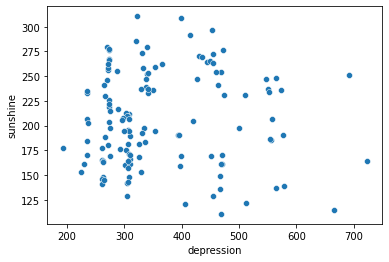

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(data=data, x='depression', y='sunshine');

La corr√©lation n'a pas l'air tr√®s importante..

Regardons les coefficients :

In [69]:
data.drop(['1990'], axis=1).corr()

depression  sunshine
depression      1.0000    0.0009
sunshine        0.0009    1.0000

<br>

**$\rightarrow$ CONCLUSION**

Le coefficient de corr√©lation est √† 0.0009, ce qui signifie qu'il existe une **l√©g√®re corr√©lation positive** entre taux d'ensoleillement et d√©pression. 

Cependant la corr√©lation n'est pas aussi importante qu'on aurait pu le croire, en tout cas **rien ne permet d'interpr√©ter cette corr√©lation comme une causalit√©**.

Pour am√©liorer notre analyse, il serait int√©ressant de prendre en compte des **variables additionnelles**, comme la taille des pays, le PIB, la population, le taux de bonheur etc. Voil√† une piste pour un projets personnel !

# Les meilleurs kebab du coin

Vous aimeriez, pour tous les restaurants kebab de Paris, acc√©der au nom, √† l'adresse, et √† la note moyenne donn√©e sur le site kebab-frites.

*Indice: https://www.kebab-frites.com/meilleur-kebab/paris-d54.html*

In [70]:
link = 'https://www.kebab-frites.com/meilleur-kebab/paris-d54.html'
kebab_rep = requests.get(link).content
kebab_soup = BeautifulSoup(kebab_rep, 'html.parser')
print(kebab_soup.prettify())

<!DOCTYPE html>
<html lang="fr" xmlns:og="https://ogp.me/ns#">
 <head>
  <title>
   Classement des Meilleurs Kebabs 2023 - Paris
  </title>
  <meta charset="utf-8"/>
  <meta content="width=device-width, initial-scale=1.0" name="viewport"/>
  <meta content="Paris - Classement des meilleurs kebabs 2023 √† Paris 10, Paris 18, Paris 19, Paris 20, Paris 14, Paris 11,   ..." name="description"/>
  <link href="https://www.kebab-frites.com/meilleur-kebab/paris-d54.html" rel="canonical"/>
  <link as="style" href="/assets/css/styles.min.css?t=2022100349" rel="preload"/>
  <link as="font" crossorigin="" href="/assets/fonts/weasy.woff2?35074974" rel="preload" type="font/woff2"/>
  <style>
   body {font-family: Arial, Helvetica, sans-serif;font-size: 1em}header {position: relative;margin: 0 auto;display: flex; align-items: center;    max-width: 1180px;    height: 60px;    padding: 0 30px}header p.logo {    cursor: pointer;    width: 280px;    margin: 0;    text-indent: -80000px;    background: url(

In [71]:
big_div = kebab_soup.find_all('div', {"class":"thumb col4"})

## R√©cup√©rer le nom des 20 restaurants cit√©s en 2022

In [72]:
restaurants = []
for part in big_div:
    for title in part.find_all('h3'):
        restaurants.append(title.get_text())

restaurants

['#1 - Streaters',
 '#2 - Mondial Kebab',
 '#3 - Casse Croute Grec',
 '#4 - Ozlem Snack',
 '#5 - La Turquoise',
 '#6 - D√©lice Jussieu',
 '#7 - Paristanbul',
 '#8 - Taksim',
 '#9 - Kebab Des Batignolles',
 '#10 - Rep√®re Gourmand',
 '#11 - Bosphore',
 '#12 - Buffet Dost',
 '#13 - Restaurant Antalya',
 '#14 - Restaurant Adana',
 '#15 - Eph√®s',
 '#16 - Le Relais de la Bastille',
 '#17 - Dailyfood',
 '#18 - La Voie Lact√©e',
 '#19 - Our Kebab',
 '#20 - Ladess',
 '#21 - Chez Les 4 Fr√®res Bedri',
 '#22 - La Gr√®ce',
 '#23 - Zelal',
 '#24 - Grill Istanbul',
 "#25 - L'original",
 '#26 - Restaurant Gap',
 "#27 - Les d√©lices d'amour",
 '#28 - Restaurant Kiraz',
 '#29 - Firat',
 '#30 - Sefa Antalya',
 '#31 - Apollon',
 '#32 - Chez les deux amis',
 '#33 - Cristal Doner',
 '#34 - Matisse',
 "#35 - L'as du fallafel",
 "#36 - Buffet d'Auteuil",
 "#37 - L' √Æle De Cr√™te",
 '#38 - Nabab Kebab',
 '#39 - Le 32',
 '#40 - Le Cedre',
 '#41 - Le Plaisir indien',
 '#42 - Restaurant Istanbul',
 '#43 - Res

## R√©cup√©rer l'adresse des 20 restaurants cit√©s en 2022

In [73]:
adresses = []
for part in big_div:
    for adresse in part.find_all('p'):
        adresses.append(adresse.get_text())

adresses

['39 Rue Des Pyr√©n√©es Paris 2075020 Paris 20',
 '190 Avenue de clichy75017 Paris 17',
 "4 rue de l'Ecole Polytechnique75005 Paris 05",
 '57 rue Petites Ecuries75010 Paris 10',
 '30 Rue Pernety75014 Paris 14',
 '4 rue Linn√©75005 Paris 05',
 '16 rue Saint-Lazare75009 Paris 09',
 '170 avenue Jean Jaures75019 Paris 19',
 '43 Rue Des Batignolles75017 Paris 17',
 '31 Boulevard Murat75016 Paris 16',
 "111 Avenue d'Italie75013 Paris 13",
 "92 rue d'Avron75020 Paris 20",
 '19 Rue Pernety75014 Paris 14',
 '190 Rue de Crim√©e75019 Paris 19',
 '110 Rue Raymond Losserand75014 Paris 14',
 '11 rue de la Roquette75011 Paris 11',
 '194 avenue de versailles75016 Paris 16',
 '3 rue des ecoles75005 Paris 05',
 '41 rue de Londres75008 Paris 08',
 '15 Avenue De Clichy75017 Paris 17',
 '38 Rue Louis Blanc75010 Paris 10',
 '3 Place V√©n√©tie75013 Paris 13',
 '152 Avenue de Clichy75017 Paris 17',
 '219 Rue du Faubourg Saint-Martin75010 Paris 10',
 '69 rue Ordener75018 Paris 18',
 '39 Rue Pascal75005 Paris 0

In [74]:
#adresses = adresses[2::3]
adresses

['39 Rue Des Pyr√©n√©es Paris 2075020 Paris 20',
 '190 Avenue de clichy75017 Paris 17',
 "4 rue de l'Ecole Polytechnique75005 Paris 05",
 '57 rue Petites Ecuries75010 Paris 10',
 '30 Rue Pernety75014 Paris 14',
 '4 rue Linn√©75005 Paris 05',
 '16 rue Saint-Lazare75009 Paris 09',
 '170 avenue Jean Jaures75019 Paris 19',
 '43 Rue Des Batignolles75017 Paris 17',
 '31 Boulevard Murat75016 Paris 16',
 "111 Avenue d'Italie75013 Paris 13",
 "92 rue d'Avron75020 Paris 20",
 '19 Rue Pernety75014 Paris 14',
 '190 Rue de Crim√©e75019 Paris 19',
 '110 Rue Raymond Losserand75014 Paris 14',
 '11 rue de la Roquette75011 Paris 11',
 '194 avenue de versailles75016 Paris 16',
 '3 rue des ecoles75005 Paris 05',
 '41 rue de Londres75008 Paris 08',
 '15 Avenue De Clichy75017 Paris 17',
 '38 Rue Louis Blanc75010 Paris 10',
 '3 Place V√©n√©tie75013 Paris 13',
 '152 Avenue de Clichy75017 Paris 17',
 '219 Rue du Faubourg Saint-Martin75010 Paris 10',
 '69 rue Ordener75018 Paris 18',
 '39 Rue Pascal75005 Paris 0

## R√©cup√©rer la note des 20 restaurants cit√©s en 2022

*indice: utiliser `.select`*

In [75]:
for part in big_div:
    for star in part.select('div[class*="stars "]'):
        print(star)

<div class="stars s6"><div></div></div>
<div class="stars s5"><div></div></div>
<div class="stars s5"><div></div></div>
<div class="stars s5"><div></div></div>
<div class="stars s5"><div></div></div>
<div class="stars s6"><div></div></div>
<div class="stars s5"><div></div></div>
<div class="stars s6"><div></div></div>
<div class="stars s4"><div></div></div>
<div class="stars s5"><div></div></div>
<div class="stars s5"><div></div></div>
<div class="stars s5"><div></div></div>
<div class="stars s5"><div></div></div>
<div class="stars s5"><div></div></div>
<div class="stars s5"><div></div></div>
<div class="stars s2"><div></div></div>
<div class="stars s4"><div></div></div>
<div class="stars s5"><div></div></div>
<div class="stars s5"><div></div></div>
<div class="stars s5"><div></div></div>
<div class="stars s6"><div></div></div>
<div class="stars s4"><div></div></div>
<div class="stars s5"><div></div></div>
<div class="stars s5"><div></div></div>
<div class="stars s5"><div></div></div>


In [76]:
'<div class="stars s5"><div></div></div>'.split('"')

['<div class=', 'stars s5', '><div></div></div>']

In [77]:
'<div class="stars s5"><div></div></div>'.split('"')[1][-1]

'5'

In [78]:
notes_sur_6 = []
for part in big_div:
    for star in part.select('div[class*="stars "]'):
        notes_sur_6.append(str(star).split('"')[1][-1])

notes_sur_6

['6',
 '5',
 '5',
 '5',
 '5',
 '6',
 '5',
 '6',
 '4',
 '5',
 '5',
 '5',
 '5',
 '5',
 '5',
 '2',
 '4',
 '5',
 '5',
 '5',
 '6',
 '4',
 '5',
 '5',
 '5',
 '5',
 '5',
 '5',
 '5',
 '4',
 '4',
 '5',
 '5',
 '5',
 '4',
 '4',
 '5',
 '5',
 '6',
 '5',
 '4',
 '4',
 '4',
 '4',
 '4',
 '5',
 '4',
 '5',
 '3',
 '5']

## R√©cup√©rer le nombre d'avis pour les 20 restaurants cit√©s en 2022

In [79]:
for part in big_div:
    for avis in part.select('div[class*="avis"]'):
        print(avis)

<div class="avis">220¬†avis</div>
<div class="avis">21¬†avis</div>
<div class="avis">103¬†avis</div>
<div class="avis">4¬†avis</div>
<div class="avis">150¬†avis</div>
<div class="avis">35¬†avis</div>
<div class="avis">6¬†avis</div>
<div class="avis">3¬†avis</div>
<div class="avis">123¬†avis</div>
<div class="avis">26¬†avis</div>
<div class="avis">15¬†avis</div>
<div class="avis">37¬†avis</div>
<div class="avis">33¬†avis</div>
<div class="avis">11¬†avis</div>
<div class="avis">22¬†avis</div>
<div class="avis">6¬†avis</div>
<div class="avis">8¬†avis</div>
<div class="avis">50¬†avis</div>
<div class="avis">35¬†avis</div>
<div class="avis">26¬†avis</div>
<div class="avis">23¬†avis</div>
<div class="avis">6¬†avis</div>
<div class="avis">24¬†avis</div>
<div class="avis">3¬†avis</div>
<div class="avis">26¬†avis</div>
<div class="avis">6¬†avis</div>
<div class="avis">24¬†avis</div>
<div class="avis">17¬†avis</div>
<div class="avis">2¬†avis</div>
<div class="avis">29¬†avis</div>
<div class="avi

In [80]:
nb_avis = []
for part in big_div:
    for avis in part.select('div[class*="avis"]'):
        nb_avis.append(str(avis).split('>')[1].split()[0])
nb_avis

['220',
 '21',
 '103',
 '4',
 '150',
 '35',
 '6',
 '3',
 '123',
 '26',
 '15',
 '37',
 '33',
 '11',
 '22',
 '6',
 '8',
 '50',
 '35',
 '26',
 '23',
 '6',
 '24',
 '3',
 '26',
 '6',
 '24',
 '17',
 '2',
 '29',
 '50',
 '18',
 '18',
 '5',
 '21',
 '141',
 '16',
 '24',
 '20',
 '6',
 '13',
 '4',
 '11',
 '8',
 '30',
 '7',
 '6',
 '7',
 '11',
 '12']

## Avec pandas, cr√©er un DataFrame avec les informations reccueillies

In [99]:
import pandas as pd

In [100]:
kebab = pd.DataFrame({'Nom': restaurants, 'Adresse': adresses, 'Note (/6)': notes_sur_6, 'Nombre avis': nb_avis})
kebab

Nom  \
0                          #1 - Streaters   
1                      #2 - Mondial Kebab   
2                  #3 - Casse Croute Grec   
3                        #4 - Ozlem Snack   
4                       #5 - La Turquoise   
5                     #6 - D√©lice Jussieu   
6                        #7 - Paristanbul   
7                             #8 - Taksim   
8              #9 - Kebab Des Batignolles   
9                   #10 - Rep√®re Gourmand   
10                         #11 - Bosphore   
11                      #12 - Buffet Dost   
12               #13 - Restaurant Antalya   
13                 #14 - Restaurant Adana   
14                            #15 - Eph√®s   
15         #16 - Le Relais de la Bastille   
16                        #17 - Dailyfood   
17                   #18 - La Voie Lact√©e   
18                        #19 - Our Kebab   
19                           #20 - Ladess   
20          #21 - Chez Les 4 Fr√®res Bedri   
21                         #22 - La Gr√®ce   
22                            #23 - Zelal   
23                   #24 - Grill Istanbul   
24                       #25 - L'original   
25                   #26 - Restaurant Gap   
26              #27 - Les d√©lices d'amour   
27                 #28 - Restaurant Kiraz   
28                            #29 - Firat   
29                     #30 - Sefa Antalya   
30                          #31 - Apollon   
31               #32 - Chez les deux amis   
32                    #33 - Cristal Doner   
33                          #34 - Matisse   
34                 #35 - L'as du fallafel   
35                 #36 - Buffet d'Auteuil   
36                  #37 - L' √Æle De Cr√™te   
37                      #38 - Nabab Kebab   
38                            #39 - Le 32   
39                         #40 - Le Cedre   
40                #41 - Le Plaisir indien   
41              #42 - Restaurant Istanbul   
42                 #43 - Restaurant Sibel   
43                       #44 - Al Boustan   
44                          #45 - La paix   
45                #46 - Sandwicherie Grec   
46                           #47 - Grill√©   
47                          #48 - Vitamin   
48                      #49 - Pacha Kebab   
49  #50 - D√©lices aux mille et une epices   

                                           Adresse Note (/6) Nombre avis  
0       39 Rue Des Pyr√©n√©es Paris 2075020 Paris 20         6         220  
1               190 Avenue de clichy75017 Paris 17         5          21  
2     4 rue de l'Ecole Polytechnique75005 Paris 05         5         103  
3             57 rue Petites Ecuries75010 Paris 10         5           4  
4                     30 Rue Pernety75014 Paris 14         5         150  
5                        4 rue Linn√©75005 Paris 05         6          35  
6                16 rue Saint-Lazare75009 Paris 09         5           6  
7             170 avenue Jean Jaures75019 Paris 19         6           3  
8             43 Rue Des Batignolles75017 Paris 17         4         123  
9                 31 Boulevard Murat75016 Paris 16         5          26  
10               111 Avenue d'Italie75013 Paris 13         5          15  
11                    92 rue d'Avron75020 Paris 20         5          37  
12                    19 Rue Pernety75014 Paris 14         5          33  
13                 190 Rue de Crim√©e75019 Paris 19         5          11  
14         110 Rue Raymond Losserand75014 Paris 14         5          22  
15             11 rue de la Roquette75011 Paris 11         2           6  
16          194 avenue de versailles75016 Paris 16         4           8  
17                  3 rue des ecoles75005 Paris 05         5          50  
18                 41 rue de Londres75008 Paris 08         5          35  
19               15 Avenue De Clichy75017 Paris 17         5          26  
20                38 Rue Louis Blanc75010 Paris 10         6          23  
21                   3 Place V√©n√©tie75013 Paris 13         4           6  


## Veillez aux types des colonnes

In [101]:
kebab['Note (/6)'] = kebab['Note (/6)'].astype(int)
kebab['Nombre avis'] = kebab['Nombre avis'].astype(int)

In [102]:
kebab.dtypes

Nom            object
Adresse        object
Note (/6)       int64
Nombre avis     int64
dtype: object

### Nettoyer le nom du restaurant en enlevant le num√©ro d'apparition (#num)

In [103]:
'#1 - Casse Croute Grec'.split(' - ')[-1]

'Casse Croute Grec'

In [104]:
kebab['Nom'] = kebab['Nom'].apply(lambda nom: nom.split(' - ')[-1])
kebab

Nom  \
0                         Streaters   
1                     Mondial Kebab   
2                 Casse Croute Grec   
3                       Ozlem Snack   
4                      La Turquoise   
5                    D√©lice Jussieu   
6                       Paristanbul   
7                            Taksim   
8             Kebab Des Batignolles   
9                   Rep√®re Gourmand   
10                         Bosphore   
11                      Buffet Dost   
12               Restaurant Antalya   
13                 Restaurant Adana   
14                            Eph√®s   
15         Le Relais de la Bastille   
16                        Dailyfood   
17                   La Voie Lact√©e   
18                        Our Kebab   
19                           Ladess   
20          Chez Les 4 Fr√®res Bedri   
21                         La Gr√®ce   
22                            Zelal   
23                   Grill Istanbul   
24                       L'original   
25                   Restaurant Gap   
26              Les d√©lices d'amour   
27                 Restaurant Kiraz   
28                            Firat   
29                     Sefa Antalya   
30                          Apollon   
31               Chez les deux amis   
32                    Cristal Doner   
33                          Matisse   
34                 L'as du fallafel   
35                 Buffet d'Auteuil   
36                  L' √Æle De Cr√™te   
37                      Nabab Kebab   
38                            Le 32   
39                         Le Cedre   
40                Le Plaisir indien   
41              Restaurant Istanbul   
42                 Restaurant Sibel   
43                       Al Boustan   
44                          La paix   
45                Sandwicherie Grec   
46                           Grill√©   
47                          Vitamin   
48                      Pacha Kebab   
49  D√©lices aux mille et une epices   

                                           Adresse  Note (/6)  Nombre avis  
0       39 Rue Des Pyr√©n√©es Paris 2075020 Paris 20          6          220  
1               190 Avenue de clichy75017 Paris 17          5           21  
2     4 rue de l'Ecole Polytechnique75005 Paris 05          5          103  
3             57 rue Petites Ecuries75010 Paris 10          5            4  
4                     30 Rue Pernety75014 Paris 14          5          150  
5                        4 rue Linn√©75005 Paris 05          6           35  
6                16 rue Saint-Lazare75009 Paris 09          5            6  
7             170 avenue Jean Jaures75019 Paris 19          6            3  
8             43 Rue Des Batignolles75017 Paris 17          4          123  
9                 31 Boulevard Murat75016 Paris 16          5           26  
10               111 Avenue d'Italie75013 Paris 13          5           15  
11                    92 rue d'Avron75020 Paris 20          5           37  
12                    19 Rue Pernety75014 Paris 14          5           33  
13                 190 Rue de Crim√©e75019 Paris 19          5           11  
14         110 Rue Raymond Losserand75014 Paris 14          5           22  
15             11 rue de la Roquette75011 Paris 11          2            6  
16          194 avenue de versailles75016 Paris 16          4            8  
17                  3 rue des ecoles75005 Paris 05          5           50  
18                 41 rue de Londres75008 Paris 08          5           35  
19               15 Avenue De Clichy75017 Paris 17          5           26  
20                38 Rue Louis Blanc75010 Paris 10          6           23  
21                   3 Place V√©n√©tie75013 Paris 13          4            6  
22              152 Avenue de Clichy75017 Paris 17          5           24  
23  219 Rue du Faubourg Saint-Martin75010 Paris 10          5            3  
24                    69 rue Ordener75018 Paris 18          5           26  
25                     

## Nettoyer l'adresse : on veut dans une colonne l'adresse (rue), et dans une autre le num√©ro de l'arrondissement (le code postal entier, 75xxx)

In [105]:
"190 Avenue de clichy75017 Paris 17".split(' Paris')[0][:-5]

'190 Avenue de clichy'

In [106]:
kebab['Code postal'] = kebab["Adresse"].apply(lambda adresse: adresse.split(' Paris')[0][-5:])
kebab["Adresse"] = kebab["Adresse"].apply(lambda adresse: adresse.split(' Paris')[0][:-5])
kebab

Nom                           Adresse  \
0                         Streaters                    39 Rue Des Pyr   
1                     Mondial Kebab              190 Avenue de clichy   
2                 Casse Croute Grec    4 rue de l'Ecole Polytechnique   
3                       Ozlem Snack            57 rue Petites Ecuries   
4                      La Turquoise                    30 Rue Pernety   
5                    D√©lice Jussieu                       4 rue Linn√©   
6                       Paristanbul               16 rue Saint-Lazare   
7                            Taksim            170 avenue Jean Jaures   
8             Kebab Des Batignolles            43 Rue Des Batignolles   
9                   Rep√®re Gourmand                31 Boulevard Murat   
10                         Bosphore               111 Avenue d'Italie   
11                      Buffet Dost                    92 rue d'Avron   
12               Restaurant Antalya                    19 Rue Pernety   
13                 Restaurant Adana                 190 Rue de Crim√©e   
14                            Eph√®s         110 Rue Raymond Losserand   
15         Le Relais de la Bastille             11 rue de la Roquette   
16                        Dailyfood          194 avenue de versailles   
17                   La Voie Lact√©e                  3 rue des ecoles   
18                        Our Kebab                 41 rue de Londres   
19                           Ladess               15 Avenue De Clichy   
20          Chez Les 4 Fr√®res Bedri                38 Rue Louis Blanc   
21                         La Gr√®ce                   3 Place V√©n√©tie   
22                            Zelal              152 Avenue de Clichy   
23                   Grill Istanbul  219 Rue du Faubourg Saint-Martin   
24                       L'original                    69 rue Ordener   
25                   Restaurant Gap                     39 Rue Pascal   
26              Les d√©lices d'amour             10 avenue Jean Jaur√®s   
27                 Restaurant Kiraz              24 Rue de Wattignies   
28                            Firat                175 rue Saint Maur   
29                     Sefa Antalya              74 boulevard diderot   
30                          Apollon                 24 Rue Jean Nicot   
31               Chez les deux amis           110 rue de M√©nilmontant   
32                    Cristal Doner              80 Boulevard Diderot   
33                          Matisse      60 Avenue Du G√©n√©ral Leclerc   
34                 L'as du fallafel                34 rue des rosiers   
35                 Buffet d'Auteuil                  75 rue d'auteuil   
36                  L' √Æle De Cr√™te                 10 rue Mouffetard   
37                      Nabab Kebab               72 rue de Rambuteau   
38                            Le 32        32 Rue Des Belles Feuilles   
39                         Le Cedre                  6 Rue Mouffetard   
40                Le Plaisir indien      19 Rue du faubourg du temple   
41              Restaurant Istanbul                10 rue marx dormoy   
42                 Restaurant Sibel          61 rue Raymond Losserand   
43                       Al Boustan                21 Rue Montorgueil   
44                          La paix                   14 rue d'odessa   
45                Sandwicherie Grec                   67 rue Brancion   
46                           Grill√©             15 Rue Saint-augustin   
47                          Vitamin                     8 rue d'Avron   
48                      Pacha Kebab                19 Rue d'Amsterdam   
49  D√©lices aux mille et une epices        63 rue jean pierre timbaud   

    Note (/6)  Nombre avis Code postal  
0           6          220       √©n√©es  
1           5           21       75017  
2           5          103       75005  
3           5            4       75010  
4           5          150       75014  
5           6           35       75005  


## Ordonner la table selon la note, en cas d'√©galit√© en fonction du nombre d'avis

In [107]:
kebab.sort_values(by = ['Note (/6)', 'Nombre avis'], ascending=(False, False))

Nom                           Adresse  \
0                         Streaters                    39 Rue Des Pyr   
5                    D√©lice Jussieu                       4 rue Linn√©   
20          Chez Les 4 Fr√®res Bedri                38 Rue Louis Blanc   
38                            Le 32        32 Rue Des Belles Feuilles   
7                            Taksim            170 avenue Jean Jaures   
4                      La Turquoise                    30 Rue Pernety   
2                 Casse Croute Grec    4 rue de l'Ecole Polytechnique   
17                   La Voie Lact√©e                  3 rue des ecoles   
11                      Buffet Dost                    92 rue d'Avron   
18                        Our Kebab                 41 rue de Londres   
12               Restaurant Antalya                    19 Rue Pernety   
9                   Rep√®re Gourmand                31 Boulevard Murat   
19                           Ladess               15 Avenue De Clichy   
24                       L'original                    69 rue Ordener   
22                            Zelal              152 Avenue de Clichy   
26              Les d√©lices d'amour             10 avenue Jean Jaur√®s   
37                      Nabab Kebab               72 rue de Rambuteau   
14                            Eph√®s         110 Rue Raymond Losserand   
1                     Mondial Kebab              190 Avenue de clichy   
31               Chez les deux amis           110 rue de M√©nilmontant   
32                    Cristal Doner              80 Boulevard Diderot   
27                 Restaurant Kiraz              24 Rue de Wattignies   
36                  L' √Æle De Cr√™te                 10 rue Mouffetard   
10                         Bosphore               111 Avenue d'Italie   
49  D√©lices aux mille et une epices        63 rue jean pierre timbaud   
13                 Restaurant Adana                 190 Rue de Crim√©e   
45                Sandwicherie Grec                   67 rue Brancion   
47                          Vitamin                     8 rue d'Avron   
6                       Paristanbul               16 rue Saint-Lazare   
25                   Restaurant Gap                     39 Rue Pascal   
39                         Le Cedre                  6 Rue Mouffetard   
33                          Matisse      60 Avenue Du G√©n√©ral Leclerc   
3                       Ozlem Snack            57 rue Petites Ecuries   
23                   Grill Istanbul  219 Rue du Faubourg Saint-Martin   
28                            Firat                175 rue Saint Maur   
35                 Buffet d'Auteuil                  75 rue d'auteuil   
8             Kebab Des Batignolles            43 Rue Des Batignolles   
30                          Apollon                 24 Rue Jean Nicot   
44                          La paix                   14 rue d'odessa   
29                     Sefa Antalya              74 boulevard diderot   
34                 L'as du fallafel                34 rue des rosiers   
40                Le Plaisir indien      19 Rue du faubourg du temple   
42                 Restaurant Sibel          61 rue Raymond Losserand   
16                        Dailyfood          194 avenue de versailles   
43                       Al Boustan                21 Rue Montorgueil   
21                         La Gr√®ce                   3 Place V√©n√©tie   
46                           Grill√©             15 Rue Saint-augustin   
41              Restaurant Istanbul                10 rue marx dormoy   
48                      Pacha Kebab                19 Rue d'Amsterdam   
15         Le Relais de la Bastille             11 rue de la Roquette   

    Note (/6)  Nombre avis Code postal  
0           6          220       √©n√©es  
5           6           35       75005  
20          6           23       75010  
38          6           20       75016  
7           6            3       75019  
4           5          150       75014  


## Plotter le nombre de restaurants par arrondissement

In [108]:
import seaborn as sns

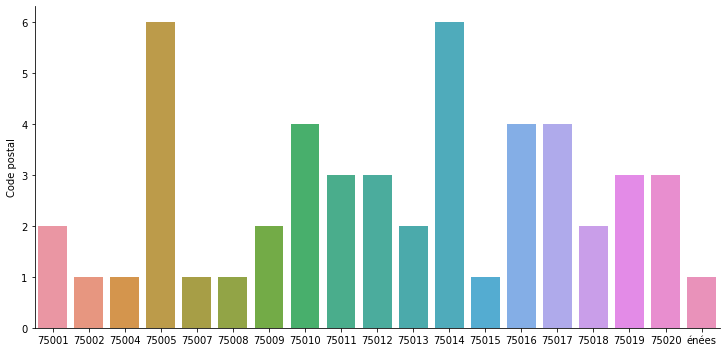

In [109]:
to_barchart = kebab['Code postal'].value_counts().sort_index().to_frame()
sns.catplot(data=to_barchart, x = to_barchart.index, y = 'Code postal', kind = 'bar', aspect=2)

## Encyclopedia (***)

On souhaite constituer une encyclop√©die au cas o√π Wikipedia dispara√Ætrait.

Pour cela, nous avons besoin d'une importante base d'articles pour que notre encyclop√©die soit viable. Nous allons donc nous r√©f√©rer √† l'article wikip√©dia qui liste les articles que toute bonne encyclop√©die devrait poss√©der : https://fr.wikipedia.org/wiki/Wikip%C3%A9dia:Liste_d%27articles_que_toutes_les_encyclop%C3%A9dies_devraient_avoir.

L'objectif de l'exercice est de sauvegarder cette liste d'articles au bon format, c'est-√†-dire en pr√©servant la hi√©rarchie des articles en sections et sous-sections.

_Indice : Le dictionnaire pourrait √™tre un bon format._

In [110]:
# Req√™te et parsing
page = requests.get('https://fr.wikipedia.org/wiki/Wikip%C3%A9dia:Liste_d%27articles_que_toutes_les_encyclop%C3%A9dies_devraient_avoir')
print(page)
soup = BeautifulSoup(page.content)

<Response [200]>


En explorant le code HTML de la page dans l'inspecteur, on voit que tout le contenu de l'article est stock√©e dans `<div class="mw-parser-output">`. On va donc se concentrer sur cette partie du code HTML.

In [111]:
content = soup.find('div', {"class":"mw-parser-output"})

On voit aussi dans l'inspecteur que les noms de sections ('Biographies', 'Religion', etc.) sont stock√©es dans des tags `<h2>`, les sous-sections dans des tags `<h3>`, et les titres d'articles dans des tags `<div>`.

Malheureusement, la difficult√© est que tous ces tags se trouvent au m√™me niveau hi√©rarchique. On va donc **it√©rer** sur tous ce tags, et en fonction du tag lu, enregistrer son contenu dans un **dictionnaire** au bon niveau hi√©rarchique.

**Exemple d'une bonne structure pour nos articles**

```python
articles = {'Biographies': {'Artiste': [Dali, Monet, ...],
                            'Chanteur': [Johnny, Madonna, ...]},
           'Histoire':,
           'Geographie':}
```

Exp√©rimentons un peu avant de coder notre boucle finale :

In [112]:
# R√©cup√©rer tous les titres et sous-titres de sections (tags h2 et h3)
[ article.get_text() for article in soup.find_all('span', {'class':'mw-headline'}) ]

['Biographies (230)',
 'Acteurs, danseurs, mannequins (4)',
 'Artistes et architectes (18)',
 '√âcrivains, po√®tes, dramaturges',
 'Musiciens (compositeurs)',
 'Compositeurs de musique populaire',
 'Interpr√®tes de musique populaire',
 'Musiciens de jazz',
 'Penseurs (16)',
 'R√©alisateurs (12)',
 'Explorateurs (10)',
 'Math√©maticiens (12)',
 'Scientifiques (14)',
 '√âconomistes (9)',
 'Inventeurs (8)',
 'Personnalit√©s politiques (39)',
 'Personnalit√©s politiques actuelles (10)',
 'Philosophie et psychologie (65)',
 'Philosophie (24)',
 'Psychologie (41)',
 'Religion (47)',
 'Sciences sociales (40)',
 'questions de soci√©t√© (8)',
 'droit (16)',
 'politique (16)',
 '√âconomie et soci√©t√© (6)',
 'Organisations internationales (13)',
 'Lettres et langues (28)',
 'Science (331)',
 'math√©matiques (20)',
 'astronomie (17)',
 'physique (26)',
 'chimie (106)',
 'biologie (41)',
 'Sant√© (64)',
 'hygi√®ne (6)',
 'sexualit√© (5)',
 'drogue (2)',
 'm√©decine (50)',
 'anatomie (26)',
 'physi

In [113]:
# Clean l'un des titres

print(list(content)[12].get_text()) # exemple de titre (h3)

list(content)[12].get_text().split(' (')[0]

Artistes et architectes (18)[modifier le code]


'Artistes et architectes'

In [114]:
# Quand on tombe sur un tag div, r√©cup√©rer tous les noms d'articles

div = list(content)[10] # exemple de tag div

[element.get_text() for element in div.find_all('li')]

['Sarah Bernhardt', 'Charlie Chaplin', 'Marl√®ne Dietrich', 'Marilyn Monroe ']

Boucle finale :

In [126]:
articles = {}
for tag in content:
    # Si h2, cr√©er une nouvelle cl√© contenant un dictionnaire
    if tag.name == 'h3':
        section = tag.get_text()
        section = section.split(' (')[0]
        #print(section)
        articles[section] = {}
        
    elif tag.name == 'div':
        #print(tag.find_all('li'))
        try:
            tag['class'] == 'colonnes'
            titles = tag.find_all('li')
            titles = [x.get_text() for x in titles]
            articles[section] = titles
        except:
            continue

In [132]:
len(articles['Math√©maticiens'])

12

## Choisir son futur ordinateur (***)

**_[MAJ] Boulanger vient de modifier le code du site et de mettre en place des mesures anti-scraping. Cet exercice ne peut donc plus √™tre effectu√© en l'√©tat. MAJ √† venir avec un autre site de vente d'informatique √©quivalent._**

Supposons que vous souhaitiez changer d'ordinateur. Vous utilisez vos nouvelles comp√©tences en scraping pour r√©aliser une √©tude des r√©f√©rences disponibles sur le site **Boulanger**.

* Scraper la premi√®re page de la cat√©gorie  **[ultrabooks](https://www.boulanger.com/c/ultrabook-ultra-portable)**. Pour chaque produit de la page, r√©cup√©rer son nom, son prix, la r√©duction s'il y en a une, le nombre d'√©toiles et les caract√©ristiques principales. Sauvegarder ces informations dans un fichier csv.
* Faire la m√™me chose avec toutes les pages de la cat√©gorie ultrabooks.

_Indice : Partir de l'URL : https://www.boulanger.com/c/ultrabook-ultra-portable. La premi√®re question est r√©alisable sans ouvrir chaque page de produit._

In [121]:
# Scraper et parser la page
url = 'https://www.boulanger.com/c/ultrabook-ultra-portable'
page = requests.get(url)
print(page)
soup = BeautifulSoup(page.content)

KeyboardInterrupt: 

**$\rightarrow$ Scraper la premi√®re page de la cat√©gorie ultrabooks**

On commence par extraire les blocs de HTML correspondant aux produits de la page, qu'on stocke dans une liste.

In [ ]:
print(soup.prettify())

In [ ]:
products = soup.find('section', {'id':'product-list'})
products = [p for p in products if p != '\n'] # ne pas garder les sauts de ligne
products

In [ ]:
products = soup.find('div', {'class':'productListe'})
products = [p for p in products if p != '\n'] # ne pas garder les sauts de ligne
products

On va pouvoir ensuite r√©aliser une boucle sur cette liste, pour extraire au fur et √† mesure les informations requises sur chaque produit.

Les informations sont stock√©es √† chaque fois dans une liste (sorte de "fiche produit"), qui vient compl√©ter petit √† petit un dictionnaire de tous les produits.

In [ ]:
from tqdm import tqdm # permet d'afficher une barre de progression d'une boucle

In [ ]:
# Extraction des informations d√©sir√©es

product_details = {} # On remplit un dict, plus facile √† convertir en df
for i, p in tqdm(enumerate(products)):

    ### PRIX ###
    price = p.find('p', {"class":"fix-price"}).get_text().strip()
    price = float(price[:-1].replace(',', '.')) # convertir str en float

    ### DISCOUNT ###
    # Structure try/except dans le cas o√π on ne trouve pas de r√©duction
    try:
        discount = p.find('span', {'class':'priceDiscount on'}).text.strip()
        discount = float(discount[1:-1]) / 100 # convertir str en float
    except:
        discount = float('nan')

    ### NOM ###
    name = p.find('h2').get_text(' ', strip=True) # ' ' = s√©parateur entre les blocs de texte

    ### RATING ###
    try:
        stars = p.find('a', {"class":"unlink"}).find('p')['class']
        stars = stars[2][-2:] # la note est affich√©e sous la forme '43'
        stars = float(stars[0] + '.' + stars[1]) # conversion en '4.3'
    except:
        stars = float('nan')

    ### CARACTERISTIQUES ###
    carac = p.find('div', {"class":"carac"}).get_text('\n', strip=True)
    carac = carac.replace('\t', '') # supprimer les \t restants

    ### Tout ajouter au dictionnaire final ###
    product_details[i] = [price, discount, name, stars, carac]

product_details

Pour terminer, ce dictionnaire est transform√© en dataframe, qui peut √™tre enregistr√© au format csv.

In [ ]:
import pandas as pd

df = pd.DataFrame.from_dict(product_details, orient='index', columns=['price', 'discount', 'name', 'rating', 'caracteristics'])
df

In [ ]:
df.to_csv('boulanger.csv', index=False)

**$\rightarrow$ Scraper toutes les pages de la cat√©gorie ultrabooks**

La premi√®re option consiste √† observer que toutes les pages de la cat√©gorie ultrabooks ont des URL similaires. Il n'y a que le num√©ro de page √† la fin de l'URL qui change : `'https://www.boulanger.com/c/ultrabook-ultra-portable?numPage=2'`.

On peut donc facilement construire artificiellement les URLs des pages suivantes et appliquer le code de la question pr√©c√©dente √† toutes les pages, dans une boucle.

La 2√®me solution, plus complexe (donc moins bonne), serait d'utiliser `selenium` pour automatiquement clique sur la page suivante.

In [ ]:
# Rassembler tout le code de la question pr√©c√©dente dans une fonction

def scrape_boulanger(url):

    page = requests.get(url)
    soup = BeautifulSoup(page.content, 'html.parser')

    products = soup.find('div', {'class':'productListe'})
    products = [p for p in products if p != '\n']

    product_details = {}
    for i, p in enumerate(products):

        ### PRIX ###
        price = p.find('p', {"class":"fix-price"}).get_text().strip()
        price = float(price[:-1].replace(',', '.'))

        ### DISCOUNT ###
        try:
            discount = p.find('span', {'class':'priceDiscount on'}).text.strip()
            discount = float(discount[1:-1]) / 100
        except:
            discount = float('nan')

        ### NOM ###
        name = p.find('h2').get_text(' ', strip=True)

        ### RATING ###
        try:
            stars = p.find('a', {"class":"unlink"}).find('p')['class']
            stars = stars[2][-2:]
            stars = float(stars[0] + '.' + stars[1])
        except:
            stars = float('nan')

        ### CARACTERISTIQUES ###
        carac = p.find('div', {"class":"carac"}).get_text('\n', strip=True)
        carac = carac.replace('\t', '')

        product_details[i] = [price, discount, name, stars, carac]

    return product_details

On ne sait pas forc√©ment combien de pages sont contenues dans la cat√©gorie, on va donc effectuer notre la boucle √† l'infini (**`while True`**) jusqu'√† ce qu'une erreur d√©clenche un `break` (**`except: break`**).

In [ ]:
# Appliquer cette fonction √† toutes les pages

i = 1 # compteur de pages
product_details = [] # liste de r√©sultats

while True:

    try:
        url_i = url + '?numPage=' + str(i)          # cr√©er l'URL de la page
        product_details_i = scrape_boulanger(url_i) # utiliser notre fonction
        product_details.append(product_details_i)   # stocker les r√©sultats
        i += 1                                      # augmenter le compteur

    except:
        break

product_details

Cette fois-ci, on a stock√© la r√©sultats dans une liste, qui contient donc 1 dictionnaire de produits par page scrap√©e.

On ne peut pas fusionner ces dictionnaires car ils ont tous les m√™mes cl√©s ("Produit 1", "Produit 2", etc., pour chaque page).

On va donc construire un dataframe par dictionnaire, puis les concat√©ner pour obtenir le r√©sultat final.

In [ ]:
# Transformer le dictionnaire de chaque page en dataframe
# On obtient une liste de dataframes
product_details_dfs = [pd.DataFrame.from_dict(d,
                                              orient='index',
                                              columns=['price', 'discount', 'name', 'rating', 'caracteristics']
                                             ) for d in product_details]

# Concat√©ner les dataframes
final_df = pd.concat(product_details_dfs, axis=0)

# Classer les produits par prix, r√©duction et note
final_df.sort_values(['price', 'discount', 'rating'], ascending=[True, False, False]).reset_index(drop=True)

## BONUS : Le chasseur d'opportunit√©s (*****, hacker level)

Enregistrer le contenu de toutes les offres de poste contenant "Data Analyst" sur Welcome to the jungle.

Cette t√¢che est rendue tr√®s compliqu√©e par les m√©thodes anti-scraping mises en place par Welcome to the jungle.

*__Marche √† suivre__*

L'URL √† utiliser pour cet exercice est :
https://www.welcometothejungle.com/fr/jobs?page=1&refinementList%5Bprofession_name.fr.Tech%5D%5B%5D=Data%20Analysis&refinementList%5Bcontract_type_names.fr%5D%5B%5D=CDI

On peut remarquer que :

1. Il y a plusieurs pages de r√©sultats, que l'on peut parcourir simplement **en changeant `page=k` dans l'URL**. Il y a **30 postes propos√©s par page** de r√©sultats.
<br><br>
2. Welcome to the jungle a impl√©ment√© des mesures anti-scraping. En particulier, une partie du HTML est cach√©e lorsque l'on requ√™te la page avec  `requests`. Il est indispensable de **commencer √† scroller** la page pour lancer le code JavaScript qui r√©v√®le le contenu cach√©.
<br><br>
$\rightarrow$ Pour r√©soudre ce probl√®me, on ne peut se contenter de BeautifulSoup. Il faut **Simuler le comportement d'une vraie personne** qui parcourt la page avec sa souris, c'est donc **Selenium** qu'il nous faut
<br><br>
$\rightarrow$ Voil√† une fonction qui permet de simuler un scroll de page jusqu'√† la i√®me offre d'emploi :
<br><br>
```
def scroll(driver, i):
        scroll_delta = int(250)
        scroll_delta += 140*i
        driver.execute_script("window.scrollBy(0, "+ str(scroll_delta) + ")")
```
<br>

3. Une autre mesure anti-scraping concerne les noms de classes, les ids et m√™me les liens vers des images dans le code HTML. Tous ces noms sont al√©atoires (ex:`class="sc-1flb27e-5 cdtiMs"`) et changent √† chaque chargement de la page.<br><br>
$\rightarrow$ Une bonne nouvelle quand m√™me : toutes les classes ne sont pas al√©atoires, certaines restent fixes. Pour les noms al√©atoires, certaines lettres du nom sont fixes √©galement. On peut donc toujours utiliser des similarit√©s pour d√©signer certains tags sp√©cifiques (ex : le tag header, contenant le nombre total de r√©sultats, commence toujours par "hd").<br><br>
$\rightarrow$ Pour exploiter cette faille, il est conseill√© d'utiliser la m√©thode Selenium **`find_elements_by_css_selector()`** pour d√©signer des tags pr√©cis, car cette m√©thode permet de d'identifier un tag par un texte partiel (ex: `driver.find_elements_by_css_selector("header[class^='hd']")` pour toutes les classes de headers qui commencent par "hd").
<br><br>
4. Au bout du compte, on souhaite sauvegarder le contenu de chaque offre d'emploi dans un fichier .txt.<br><br>
$\rightarrow$ Il va donc falloir cliquer sur chaque offre d'emploi avec la m√©thode **`.click()`** de Selenium. Pour chaque offre d'emploi, le contenu de l'offre est stock√© dans un dictionnaire √† l'int√©rieur d'un tag `<script>`. On peut utiliser la m√©thode  **`json.loads()`** pour manipuler ce dictionnaire. On peut finalement l'enregistrer en .txt avec les fonctions **`open()`** et **`.write`**.

In [ ]:
!pip install selenium

In [ ]:
!pip install webdriver_manager

In [ ]:
#!pip install --upgrade certifi
!pip install --upgrade webdriver-manager

In [226]:
# importations n√©cessaires

import time
import json

from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from webdriver_manager.chrome import ChromeDriverManager

* Version lin√©aire (sous forme de fonctions)

In [233]:
def MainPage(driver, url):
    '''Go the the first page'''
    driver.get(url)
    time.sleep(3)

def scroll(driver, i):
    scroll_delta = int(250)
    scroll_delta += 140*i
    driver.execute_script("window.scrollBy(0, "+ str(scroll_delta) + ")")

def nbOffers(driver):
    nb_offers = driver.find_elements_by_css_selector("header[class^='hd']")[0].text
    nb_offers = int(nb_offers.split(' ')[0])
    return nb_offers

def Click(driver, pos):
    '''Click on the link'''
    wait = WebDriverWait(driver, 10)
    element = wait.until(EC.element_to_be_clickable((By.CSS_SELECTOR, "li[class$='ais-Hits-list-item']")))
    element.click()
    #driver.find_elements(By.CSS_SELECTOR, "li[class$='ais-Hits-list-item']")[pos].click()
    time.sleep(3)

def GetText(driver, jobs):

    data = requests.get(driver.current_url)
    soup = BeautifulSoup(data.text, 'html.parser')
    try:
        info = soup.find("main")
        if info is not None:
            info = info.find_all('script')
            job = json.loads(str(info[0].string))
            faq = json.loads(str(info[1].string))
            job['FAQPage'] = faq['mainEntity']
        else:
            info = soup.find("div").find_all('script')
            job = json.loads(str(info[0].string))
            faq = json.loads(str(info[1].string))
            job['FAQPage'] = faq['mainEntity']

        jobs.append(job)
        f = open('wttj.txt', 'a')
        f.write(str(job))
        f.write('\n')
        f.close()
    except Exception as e:
        print(f"Error : {e}")

In [199]:
import certifi

print(certifi.where())


/Users/mac/.pyenv/versions/3.7.0/lib/python3.7/site-packages/certifi/cacert.pem


In [200]:
certi_path = "/Users/mac/.pyenv/versions/3.7.0/lib/python3.7/site-packages/certifi/cacert.pem"
import requests
from requests.packages.urllib3.util.ssl_ import create_urllib3_context

CERT_FILE_PATH = certi_path  # Replace with your certificate path
ctx = create_urllib3_context()
ctx.load_verify_locations(CERT_FILE_PATH)
requests.get('https://wiki.loliot.net', verify=CERT_FILE_PATH)


<Response [200]>

In [201]:
import os
# Set the environment variable for SSL certificate
os.environ['REQUESTS_CA_BUNDLE'] = certi_path

from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.chrome.options import Options

# Initialize Chrome options
chrome_options = Options()
# Add any specific options you need, for example:
# chrome_options.add_argument('--headless')

# Initialize Chrome WebDriver with the specified options
service = Service(ChromeDriverManager().install())
driver = webdriver.Chrome(service=service, options=chrome_options)


In [202]:
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

def nbOffers(driver):
    try:
        # Wait for the job offer elements to be present on the page
        WebDriverWait(driver, 10).until(
            EC.presence_of_all_elements_located((By.CSS_SELECTOR, "li[class$='ais-Hits-list-item']"))
        )
        
        # Find all elements with the specified class
        job_offers = driver.find_elements(By.CSS_SELECTOR, "li[class$='ais-Hits-list-item']")
        print(job_offers)
        # The total number of job offers is the number of elements found
        return len(job_offers)

    except Exception as e:
        print("An error occurred:", e)
        return 0  # Or handle the exception as needed


In [203]:
# ouverture de la page et r√©cup√©ration du nombre d'offres
url = f"https://www.welcometothejungle.com/fr/jobs?page=1&configure%5Bfilters%5D=website.reference%3Awttj_fr&configure%5BhitsPerPage%5D=30&aroundQuery=France&refinementList%5Boffice.country_code%5D%5B%5D=FR&refinementList%5Bcontract_type_names.fr%5D%5B%5D=CDI&refinementList%5Bcontract_type_names.fr%5D%5B%5D=Stage&query=%22data%20analyst%22&range%5Bexperience_level_minimum%5D%5Bmin%5D=0&range%5Bexperience_level_minimum%5D%5Bmax%5D=1"
MainPage(driver, url)
nb_offers = nbOffers(driver)

[<selenium.webdriver.remote.webelement.WebElement (session="d1a2045fabd7b2bee16789335949a988", element="1ED931AAD4384DB15CA61A393AE7F260_element_59")>, <selenium.webdriver.remote.webelement.WebElement (session="d1a2045fabd7b2bee16789335949a988", element="1ED931AAD4384DB15CA61A393AE7F260_element_60")>, <selenium.webdriver.remote.webelement.WebElement (session="d1a2045fabd7b2bee16789335949a988", element="1ED931AAD4384DB15CA61A393AE7F260_element_61")>, <selenium.webdriver.remote.webelement.WebElement (session="d1a2045fabd7b2bee16789335949a988", element="1ED931AAD4384DB15CA61A393AE7F260_element_62")>, <selenium.webdriver.remote.webelement.WebElement (session="d1a2045fabd7b2bee16789335949a988", element="1ED931AAD4384DB15CA61A393AE7F260_element_63")>, <selenium.webdriver.remote.webelement.WebElement (session="d1a2045fabd7b2bee16789335949a988", element="1ED931AAD4384DB15CA61A393AE7F260_element_64")>, <selenium.webdriver.remote.webelement.WebElement (session="d1a2045fabd7b2bee16789335949a988",

In [240]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options

options = Options()
#options.add_argument("user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3")
options.add_argument("--headless")
options.add_argument("--disable-extensions")
options.add_argument("--ignore-certificate-errors")


# waits up to 10 seconds before throwing a NoSuchElementException
driver.implicitly_wait(10)
driver = webdriver.Chrome(options=options)
driver.get(url)


MaxRetryError: HTTPConnectionPool(host='localhost', port=59603): Max retries exceeded with url: /session/7c913a00bb2b00651b3800b92feff72c/timeouts (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x120176898>: Failed to establish a new connection: [Errno 61] Connection refused'))

In [182]:
nb_offers

30

In [207]:
Click(driver, 0)

ElementClickInterceptedException: Message: element click intercepted: Element <li class="sc-bXCLTC kkKAOM ais-Hits-list-item">...</li> is not clickable at point (202, 669). Other element would receive the click: <button id="axeptio_btn_configure" aria-label="... les cookies √† configurer" class="ButtonGroup__BtnStyle-sc-1usw1pe-0 eSCMiI">Je choisis</button>
  (Session info: chrome=119.0.6045.199)
Stacktrace:
0   chromedriver                        0x000000010ae7fd28 chromedriver + 4795688
1   chromedriver                        0x000000010ae772b3 chromedriver + 4760243
2   chromedriver                        0x000000010aa5088d chromedriver + 407693
3   chromedriver                        0x000000010aaa738a chromedriver + 762762
4   chromedriver                        0x000000010aaa4d0b chromedriver + 752907
5   chromedriver                        0x000000010aaa2174 chromedriver + 741748
6   chromedriver                        0x000000010aaa0e89 chromedriver + 736905
7   chromedriver                        0x000000010aa933fa chromedriver + 680954
8   chromedriver                        0x000000010aac6ca2 chromedriver + 892066
9   chromedriver                        0x000000010aa92c63 chromedriver + 679011
10  chromedriver                        0x000000010aac6e5e chromedriver + 892510
11  chromedriver                        0x000000010aae2b2b chromedriver + 1006379
12  chromedriver                        0x000000010aac6a73 chromedriver + 891507
13  chromedriver                        0x000000010aa91143 chromedriver + 672067
14  chromedriver                        0x000000010aa9231e chromedriver + 676638
15  chromedriver                        0x000000010ae40795 chromedriver + 4536213
16  chromedriver                        0x000000010ae45853 chromedriver + 4556883
17  chromedriver                        0x000000010ae26001 chromedriver + 4427777
18  chromedriver                        0x000000010ae4659d chromedriver + 4560285
19  chromedriver                        0x000000010ae1748c chromedriver + 4367500
20  chromedriver                        0x000000010ae660e8 chromedriver + 4690152
21  chromedriver                        0x000000010ae6629e chromedriver + 4690590
22  chromedriver                        0x000000010ae76eee chromedriver + 4759278
23  libsystem_pthread.dylib             0x00007fff702e7109 _pthread_start + 148
24  libsystem_pthread.dylib             0x00007fff702e2b8b thread_start + 15


In [208]:
job = "https://www.welcometothejungle.com/fr/companies/matera/jobs/data-analyst-stage-de-6-mois_paris?q=b8020740434afbde88e7b1725b94bbc8&o=2228430"
jobs = []
data = requests.get(driver.current_url)
soup = BeautifulSoup(data.text, 'html.parser')
#print(soup)


In [209]:
print(str(soup)[:4000])  # Print the first 1000 characters of the HTML


<!DOCTYPE html>
<html lang="fr"><head><script type="text/javascript">window.env = {"ALERTS_API_HOST":"alerts.welcometothejungle.com","ALGOLIA_API_KEY_CLIENT":"02f0d440abc99cae37e126886438b266","ALGOLIA_APPLICATION_ID":"CSEKHVMS53","ALGOLIA_APPLICATIONS_INDEX":"wk_cms_private_applications_production","ALGOLIA_ARTICLES_INDEX":"wk_cms_articles_production","ALGOLIA_JOBS_INDEX":"wk_cms_jobs_production","ALGOLIA_MEETINGS_INDEX":"wk_meetings_production","ALGOLIA_ORGANIZATIONS_INDEX":"wk_cms_organizations_production","CDN_HOST":"https://cdn.welcometothejungle.com","CDN_IMAGES_HOST":"https://cdn-images.welcometothejungle.com","EBA_API_HOST":"employerbrand.welcometothejungle.com","FLAG_NEW_ALGOLIA_JOBS_INDEX":"false","GOOGLE_CLIENT_ID":"405382547658-470vuq9vapq41apfhvlp5p4topbcic2t.apps.googleusercontent.com","GTM_CONTAINER_ID":"GTM-WZZZJQ3","HERE_API_KEY":"3YHjVgEYjuwUatQAtD-wTX8lmNXEsULPzC8m59VMGDw","HOST":"welcometothejungle.com","LINKEDIN_APP_ID":"77afzkbvda3r70","LINKEDIN_APP_SALT":"c0a507c

In [214]:
info = soup.find("div").find_all('script')
job = json.loads(str(info[0].string))
faq = json.loads(str(info[1].string))
job['FAQPage'] = faq['mainEntity']


IndexError: list index out of range

In [177]:
job

{'@context': 'http://schema.org',
 '@type': 'JobPosting',
 'FAQPage': [{'@type': 'Question',
   'acceptedAnswer': {'@type': 'Answer',
    'text': 'Le t√©l√©travail occasionnel est autoris√© pour ce poste.'},
   'name': 'Le t√©l√©travail est-il possible pour ce poste ?'},
  {'@type': 'Question',
   'acceptedAnswer': {'@type': 'Answer',
    'text': 'Le contrat pour ce poste est de type {contract_type}.'},
   'name': 'Quel est le type de contrat pour ce poste ?'},
  {'@type': 'Question',
   'acceptedAnswer': {'@type': 'Answer',
    'text': 'Le contrat pour cette offre de job d√©marre le {start_date}'},
   'name': 'Quelle est la date de d√©but du contrat?'},
  {'@type': 'Question',
   'acceptedAnswer': {'@type': 'Answer',
    'text': "Aucune exp√©rience n'est n√©cessaire pour postuler √† cette offre."},
   'name': 'Une exp√©rience est-elle requise pour cette offre?'}],
 'baseSalary': {'@type': 'MonetaryAmount',
  'currency': 'EUR',
  'value': {'@type': 'QuantitativeValue',
   'maxValue': 1

In [238]:

def Click(driver, pos):
    '''Click on the link'''
    
    from selenium.webdriver.common.action_chains import ActionChains

    #element = driver.find_elements(By.CSS_SELECTOR, "li[class$='ais-Hits-list-item']")[pos]
    #ActionChains(driver).move_to_element(element).perform()
    #element.click()
    
    #wait = WebDriverWait(driver, 10)
    #element = wait.until(EC.element_to_be_clickable((By.CSS_SELECTOR, "li[class$='ais-Hits-list-item']")))
    #element.click()
    #driver.find_elements(By.CSS_SELECTOR, "li[class$='ais-Hits-list-item']")[pos].click()
    element = WebDriverWait(driver, 5).until(
        EC.presence_of_element_located((By.CLASSNAME, "ais-Hits-list-item"))
    )
    element.click()
    time.sleep(3)
    
    
# boucle de scraping
counter = 1
jobs = []
for i in range (1, (nb_offers // 30) + 1):
    url = f"https://www.welcometothejungle.com/fr/jobs?page={i}&configure%5Bfilters%5D=website.reference%3Awttj_fr&configure%5BhitsPerPage%5D=30&aroundQuery=France&refinementList%5Boffice.country_code%5D%5B%5D=FR&refinementList%5Bcontract_type_names.fr%5D%5B%5D=CDI&refinementList%5Bcontract_type_names.fr%5D%5B%5D=Stage&query=%22data%20analyst%22&range%5Bexperience_level_minimum%5D%5Bmin%5D=0&range%5Bexperience_level_minimum%5D%5Bmax%5D=1"
    for j in range(0,30):
        print(j)
        MainPage(driver, url)
        scroll(driver, j)
        Click(driver, j)
        GetText(driver, jobs)
        print(f"\r{counter}/{nb_offers}", end='')
        counter += 1

0


MaxRetryError: HTTPConnectionPool(host='localhost', port=59603): Max retries exceeded with url: /session/7c913a00bb2b00651b3800b92feff72c/url (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x120150c18>: Failed to establish a new connection: [Errno 61] Connection refused'))

* Version orient√©e objet (sous forme de classe)

In [ ]:
class WTTJcrapper():

    def __init__(self):
        '''Init bot'''
        self.driver = webdriver.Chrome(ChromeDriverManager().install())
        self.driver.wait = WebDriverWait(self.driver, 1)
        self.jobs = []

    def MainPage(self, url):
        '''Go the the first page'''
        self.driver.get(url)
        time.sleep(3)

    def scroll(self,i):
        scroll_delta = int(250)
        scroll_delta += 140*i
        self.driver.execute_script("window.scrollBy(0, "+ str(scroll_delta) + ")")

    def nbOffers(self):
        nb = self.driver.find_elements_by_css_selector("header[class^='hd']")[0].text
        self.nb_offers = int(nb.split(' ')[0])

    def Click(self, pos):
        '''Click on the link'''
        self.driver.find_elements_by_css_selector("li[class^='ais-Hits-list-item']")[pos].click()
        time.sleep(2)

    def GetText(self):
        data = requests.get(self.driver.current_url)
        soup = BeautifulSoup(data.text, 'html.parser')
        info = soup.find("main").find_all('script')
        job = json.loads(str(info[0].string))
        faq = json.loads(str(info[1].string))
        job['content']['FAQPage'] = faq['content']['mainEntity']

        self.jobs.append(job)
        f = open('wttj.txt', 'a')
        f.write(str(job))
        f.write('\n')
        f.close()

In [ ]:
# nombre d'offres
url = f"https://www.welcometothejungle.com/fr/jobs?page=1&configure%5Bfilters%5D=website.reference%3Awttj_fr&configure%5BhitsPerPage%5D=30&aroundQuery=France&refinementList%5Boffice.country_code%5D%5B%5D=FR&refinementList%5Bcontract_type_names.fr%5D%5B%5D=CDI&refinementList%5Bcontract_type_names.fr%5D%5B%5D=Stage&query=%22data%20analyst%22&range%5Bexperience_level_minimum%5D%5Bmin%5D=0&range%5Bexperience_level_minimum%5D%5Bmax%5D=1"
L = WTTJcrapper()
L.MainPage(url)
L.nbOffers()
counter = 1

# scraping
for i in range (1, (L.nb_offers // 30) + 1):
    url = f"https://www.welcometothejungle.com/fr/jobs?page={i}&configure%5Bfilters%5D=website.reference%3Awttj_fr&configure%5BhitsPerPage%5D=30&aroundQuery=France&refinementList%5Boffice.country_code%5D%5B%5D=FR&refinementList%5Bcontract_type_names.fr%5D%5B%5D=CDI&refinementList%5Bcontract_type_names.fr%5D%5B%5D=Stage&query=%22data%20analyst%22&range%5Bexperience_level_minimum%5D%5Bmin%5D=0&range%5Bexperience_level_minimum%5D%5Bmax%5D=1"
    for j in range(0,30):
        L.MainPage(url)
        L.scroll(j)
        L.Click(j)
        L.GetText()
        print(f"\r{counter}/{L.nb_offers}", end='')
        counter += 1

In [218]:
from selenium import webdriver
from datetime import datetime, timedelta
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.keys import Keys
from time import time
from time import sleep
import pandas as pd
from random import randint


In [221]:
start_time = datetime.now()
print('Crawl starting time : {}' .format(start_time.time()))
print()
job_list = ["data analyst", "data scientist", "business analyst"]
wttj_data = []

for job in job_list:
    
    driver.get(
        "https://www.welcometothejungle.com/fr/jobs?query=" + job + "%20&page=1&configure%5Bfilters%5D=website.reference%3Awttj_fr&configure%5BhitsPerPage%5D=30&aroundLatLng=48.8546%2C2.34771&aroundQuery=Paris%2C%20France&aroundRadius=20000&aroundPrecision=20000&refinementList%5Bcontract_type_names.fr%5D%5B%5D=CDI&refinementList%5Bcontract_type_names.fr%5D%5B%5D=CDD%20%2F%20Temporaire&refinementList%5Bcontract_type_names.fr%5D%5B%5D=Freelance"
    )
    sleep(randint(7,10))
    print('Collecting data for "{}"...' .format(job))
    # First, get the number of jobs available
    job_number = driver.find_element("xpath", '//h2/span').text
    # Calculating number of pages to be crawled (number of jobs available - number of jobs per page (here, 30))
    job_number = job_number.split(" ", 1)
    job_number = int(job_number[0])
    print("- Number of open positions : {}" .format(job_number))
    exact_page_nb = job_number / 30
    print("- Exact number of pages to be crawled : {}" .format(exact_page_nb))
    min_page_nb = job_number // 30
    print("- Minimum number of pages to be crawled : {}" .format(min_page_nb))

    if exact_page_nb > min_page_nb:
        page_nb = min_page_nb + 2
    elif exact_page_nb == min_page_nb:
        page_nb = min_page_nb + 1

    pages = [str(i) for i in range(1, page_nb)]

    for page in pages:
        driver.get(
            "https://www.welcometothejungle.com/fr/jobs?query=" + job + "%20&page=" + page + "&configure%5Bfilters%5D=website.reference%3Awttj_fr&configure%5BhitsPerPage%5D=30&aroundLatLng=48.8546%2C2.34771&aroundQuery=Paris%2C%20France&aroundRadius=20000&aroundPrecision=20000&refinementList%5Bcontract_type_names.fr%5D%5B%5D=CDI&refinementList%5Bcontract_type_names.fr%5D%5B%5D=CDD%20%2F%20Temporaire&refinementList%5Bcontract_type_names.fr%5D%5B%5D=Freelance"
        )

        sleep(randint(5, 12))

        # Locating job container
        all_articles = driver.find_elements_by_xpath("//article[@class='sc-1kkiv1h-12 sc-1flb27e-6 jFwpgJ']")

        for article in all_articles:
            job_link = article.find_element_by_css_selector('a').get_attribute('href')
            wttj_data.append(article.text)
            wttj_data.append(job_link)
            wttj_data.append('welcome to the jungle')
            wttj_data.append(datetime.now())

    print('Crawling status for "{}" : Done' .format(job))
    print()

    driver.quit()

print('Crawling time : {}' .format(datetime.now() - start_time))
print('Dataframe successfuly created and exported')

# Dataframe creation
df = pd.DataFrame(wttj_data,columns=['data'])

#----------------------------------------------------------------------

# Saving .csv file within the "new_datasets" directory
csv_file = 'welcome_to_the_jungle_data_{}.csv' .format(datetime.now())
df.to_csv(r'datasets/' + csv_file) 

Crawl starting time : 17:34:20.083487



NoSuchElementException: Message: no such element: Unable to locate element: {"method":"xpath","selector":"//h2/span"}
  (Session info: chrome=119.0.6045.199); For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#no-such-element-exception
Stacktrace:
0   chromedriver                        0x000000010ae7fd28 chromedriver + 4795688
1   chromedriver                        0x000000010ae772b3 chromedriver + 4760243
2   chromedriver                        0x000000010aa5088d chromedriver + 407693
3   chromedriver                        0x000000010aa9f3d9 chromedriver + 730073
4   chromedriver                        0x000000010aa9f591 chromedriver + 730513
5   chromedriver                        0x000000010aae57e4 chromedriver + 1017828
6   chromedriver                        0x000000010aac6ccd chromedriver + 892109
7   chromedriver                        0x000000010aae2b2b chromedriver + 1006379
8   chromedriver                        0x000000010aac6a73 chromedriver + 891507
9   chromedriver                        0x000000010aa91143 chromedriver + 672067
10  chromedriver                        0x000000010aa9231e chromedriver + 676638
11  chromedriver                        0x000000010ae40795 chromedriver + 4536213
12  chromedriver                        0x000000010ae45853 chromedriver + 4556883
13  chromedriver                        0x000000010ae26001 chromedriver + 4427777
14  chromedriver                        0x000000010ae4659d chromedriver + 4560285
15  chromedriver                        0x000000010ae1748c chromedriver + 4367500
16  chromedriver                        0x000000010ae660e8 chromedriver + 4690152
17  chromedriver                        0x000000010ae6629e chromedriver + 4690590
18  chromedriver                        0x000000010ae76eee chromedriver + 4759278
19  libsystem_pthread.dylib             0x00007fff702e7109 _pthread_start + 148
20  libsystem_pthread.dylib             0x00007fff702e2b8b thread_start + 15


In [224]:
from selenium import webdriver
from datetime import datetime
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.keys import Keys
from selenium.common.exceptions import NoSuchElementException
from time import time
from time import sleep
import pandas as pd
from random import randint

website = """
#########################################
#           WEBSITE: INDEED.FR          #
######################################### 
"""
print(website)
start_time = datetime.now()
print('Crawl starting time : {}' .format(start_time.time()))
print()
job_list = ["data+analyst", "data+scientist", "business+analyst"]

application_links = []
job_titles = []
company_names = []
job_locations = []
application_types = []
publication_dates = []
scraping_dates = []

for job in job_list:

    driver.get(
            "https://www.indeed.fr/jobs?q=" + job + "&l=Paris+%2875%29&jt=fulltime&limit=50&radius=25&start=0"
        )

    sleep(randint(7,10))
    print('Collecting data for "{}"...' .format(job))
    # First, get the number of jobs available
    job_number = driver.find_element("xpath", "//div[@id='searchCountPages']").text
    # Calculating number of pages to be crawled (number of jobs available - number of jobs per page (here, 30))
    job_number = job_number.split(" ", 4)
    job_number = int(job_number[3])
    print("- Number of open positions : {}" .format(job_number))
    exact_page_nb = job_number / 50
    print("- Exact number of pages to be crawled : {}" .format(exact_page_nb))
    min_page_nb = job_number // 50
    print("- Minimum number of pages to be crawled : {}" .format(min_page_nb))

    if exact_page_nb > min_page_nb:
        page_nb = (min_page_nb) * 50
        pages = [str(i) for i in range(0, page_nb, 50)]
    elif exact_page_nb == min_page_nb:
        page_nb = (min_page_nb - 1) * 50
        pages = [str(i) for i in range(0, page_nb, 50)]

    for page in pages:
        driver.get(
            "https://www.indeed.fr/jobs?q=" + job + "&l=Paris+%2875%29&jt=fulltime&limit=50&radius=25&start=" + page
        )

        sleep(randint(5, 12))

        # Locating job container
        all_cards = driver.find_elements_by_xpath("//div[@class='jobsearch-SerpJobCard unifiedRow row result clickcard']")

        for card in all_cards:

            # Collecting job link
            application_link = card.find_elements_by_css_selector('a')
            if not application_link:
                application_link = "Unknown"
            else:
                application_link = application_link[0].get_attribute('href')
            application_links.append(application_link)

            # Collecting job title
            job_title = card.find_elements_by_css_selector('a')
            if not job_title:
                job_title = "Unknown"
            else:
                job_title = job_title[0].text
            job_titles.append(job_title)

            # Collecting company name
            company_name = card.find_elements_by_css_selector('div.sjcl div span.company')
            if not company_name:
                company_name = "Unknown"
            else:
                company_name = company_name[0].text
            company_names.append(company_name)
            
            # Collecting job location
            job_location = card.find_elements_by_css_selector('.location.accessible-contrast-color-location')
            if not job_location:
                job_location = "Unknown"
            else:
                job_location = job_location[0].text
            job_locations.append(job_location)
            
            # Collecting application type (easy apply)
            application_type = card.find_elements_by_css_selector('.jobCardShelfContainer')
            if not application_type:
                application_type = "company's website"
            else:
                application_type = application_type[0].text
            application_types.append(application_type) 
            
            # Collecting publication date
            publication_date = card.find_elements_by_css_selector('span.date')
            if not publication_date:
                publication_date = "il y a 40 minutes"
            else:
                publication_date = publication_date[0].text
            publication_dates.append(publication_date)
            
            # Collecting generated scraping time 
            scraping_dates.append(datetime.now())

    print('Crawling status for "{}" : Done' .format(job))
    print()

    driver.quit()

print('Crawling time : {}' .format(datetime.now() - start_time))
print('Dataframe successfuly created and exported')

# Dataframe creation
df = pd.DataFrame({'job_title': job_titles,
'company_name': company_names,
'job_location': job_locations,
'application_link': application_links,
'publication_date': publication_dates,
'application_type': application_types,
'scraping_date': scraping_dates
})

#----------------------------------------------------------------------

# Saving .csv file within the "new_datasets" directory
csv_file = 'indeed_data_{}.csv' .format(datetime.now())
df.to_csv(r'datasets/' + csv_file) 


#########################################
#           WEBSITE: INDEED.FR          #
######################################### 

Crawl starting time : 17:37:14.828394



NoSuchElementException: Message: no such element: Unable to locate element: {"method":"xpath","selector":"//div[@id='searchCountPages']"}
  (Session info: chrome=119.0.6045.199); For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#no-such-element-exception
Stacktrace:
0   chromedriver                        0x000000010ae7fd28 chromedriver + 4795688
1   chromedriver                        0x000000010ae772b3 chromedriver + 4760243
2   chromedriver                        0x000000010aa5088d chromedriver + 407693
3   chromedriver                        0x000000010aa9f3d9 chromedriver + 730073
4   chromedriver                        0x000000010aa9f591 chromedriver + 730513
5   chromedriver                        0x000000010aae57e4 chromedriver + 1017828
6   chromedriver                        0x000000010aac6ccd chromedriver + 892109
7   chromedriver                        0x000000010aae2b2b chromedriver + 1006379
8   chromedriver                        0x000000010aac6a73 chromedriver + 891507
9   chromedriver                        0x000000010aa91143 chromedriver + 672067
10  chromedriver                        0x000000010aa9231e chromedriver + 676638
11  chromedriver                        0x000000010ae40795 chromedriver + 4536213
12  chromedriver                        0x000000010ae45853 chromedriver + 4556883
13  chromedriver                        0x000000010ae26001 chromedriver + 4427777
14  chromedriver                        0x000000010ae4659d chromedriver + 4560285
15  chromedriver                        0x000000010ae1748c chromedriver + 4367500
16  chromedriver                        0x000000010ae660e8 chromedriver + 4690152
17  chromedriver                        0x000000010ae6629e chromedriver + 4690590
18  chromedriver                        0x000000010ae76eee chromedriver + 4759278
19  libsystem_pthread.dylib             0x00007fff702e7109 _pthread_start + 148
20  libsystem_pthread.dylib             0x00007fff702e2b8b thread_start + 15
